In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
import statistics
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [2]:
baci2002 = pd.read_csv('BACI_HS02_Y2002_V202001.csv',encoding="utf8")
baci2003 = pd.read_csv('BACI_HS02_Y2003_V202001.csv',encoding="utf8")
baci2004 = pd.read_csv('BACI_HS02_Y2004_V202001.csv',encoding="utf8")
baci2005 = pd.read_csv('BACI_HS02_Y2005_V202001.csv',encoding="utf8")
baci2006 = pd.read_csv('BACI_HS02_Y2006_V202001.csv',encoding="utf8")
baci2007 = pd.read_csv('BACI_HS02_Y2007_V202001.csv',encoding="utf8")
baci2008 = pd.read_csv('BACI_HS02_Y2008_V202001.csv',encoding="utf8")
baci2009 = pd.read_csv('BACI_HS02_Y2009_V202001.csv',encoding="utf8")
baci2010 = pd.read_csv('BACI_HS02_Y2010_V202001.csv',encoding="utf8")
baci2011 = pd.read_csv('BACI_HS02_Y2011_V202001.csv',encoding="utf8")
baci2012 = pd.read_csv('BACI_HS02_Y2012_V202001.csv',encoding="utf8")
baci2013 = pd.read_csv('BACI_HS02_Y2013_V202001.csv',encoding="utf8")
baci2014 = pd.read_csv('BACI_HS02_Y2014_V202001.csv',encoding="utf8")
baci2015 = pd.read_csv('BACI_HS02_Y2015_V202001.csv',encoding="utf8")
baci2016 = pd.read_csv('BACI_HS02_Y2016_V202001.csv',encoding="utf8")
baci2017 = pd.read_csv('BACI_HS02_Y2017_V202001.csv',encoding="utf8")
baci2018 = pd.read_csv('BACI_HS02_Y2018_V202001.csv',encoding="utf8")

In [3]:
countrycode=pd.read_csv('country_codes_V202001.csv',encoding="utf8")
countrynum=list(countrycode['country_code'])
countryname=list(countrycode['iso_3digit_alpha'])
country_dict={}

for i in range(len(countrycode)):
    country_dict.update({countrynum[i]:countryname[i]})

/Users/simonkim/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


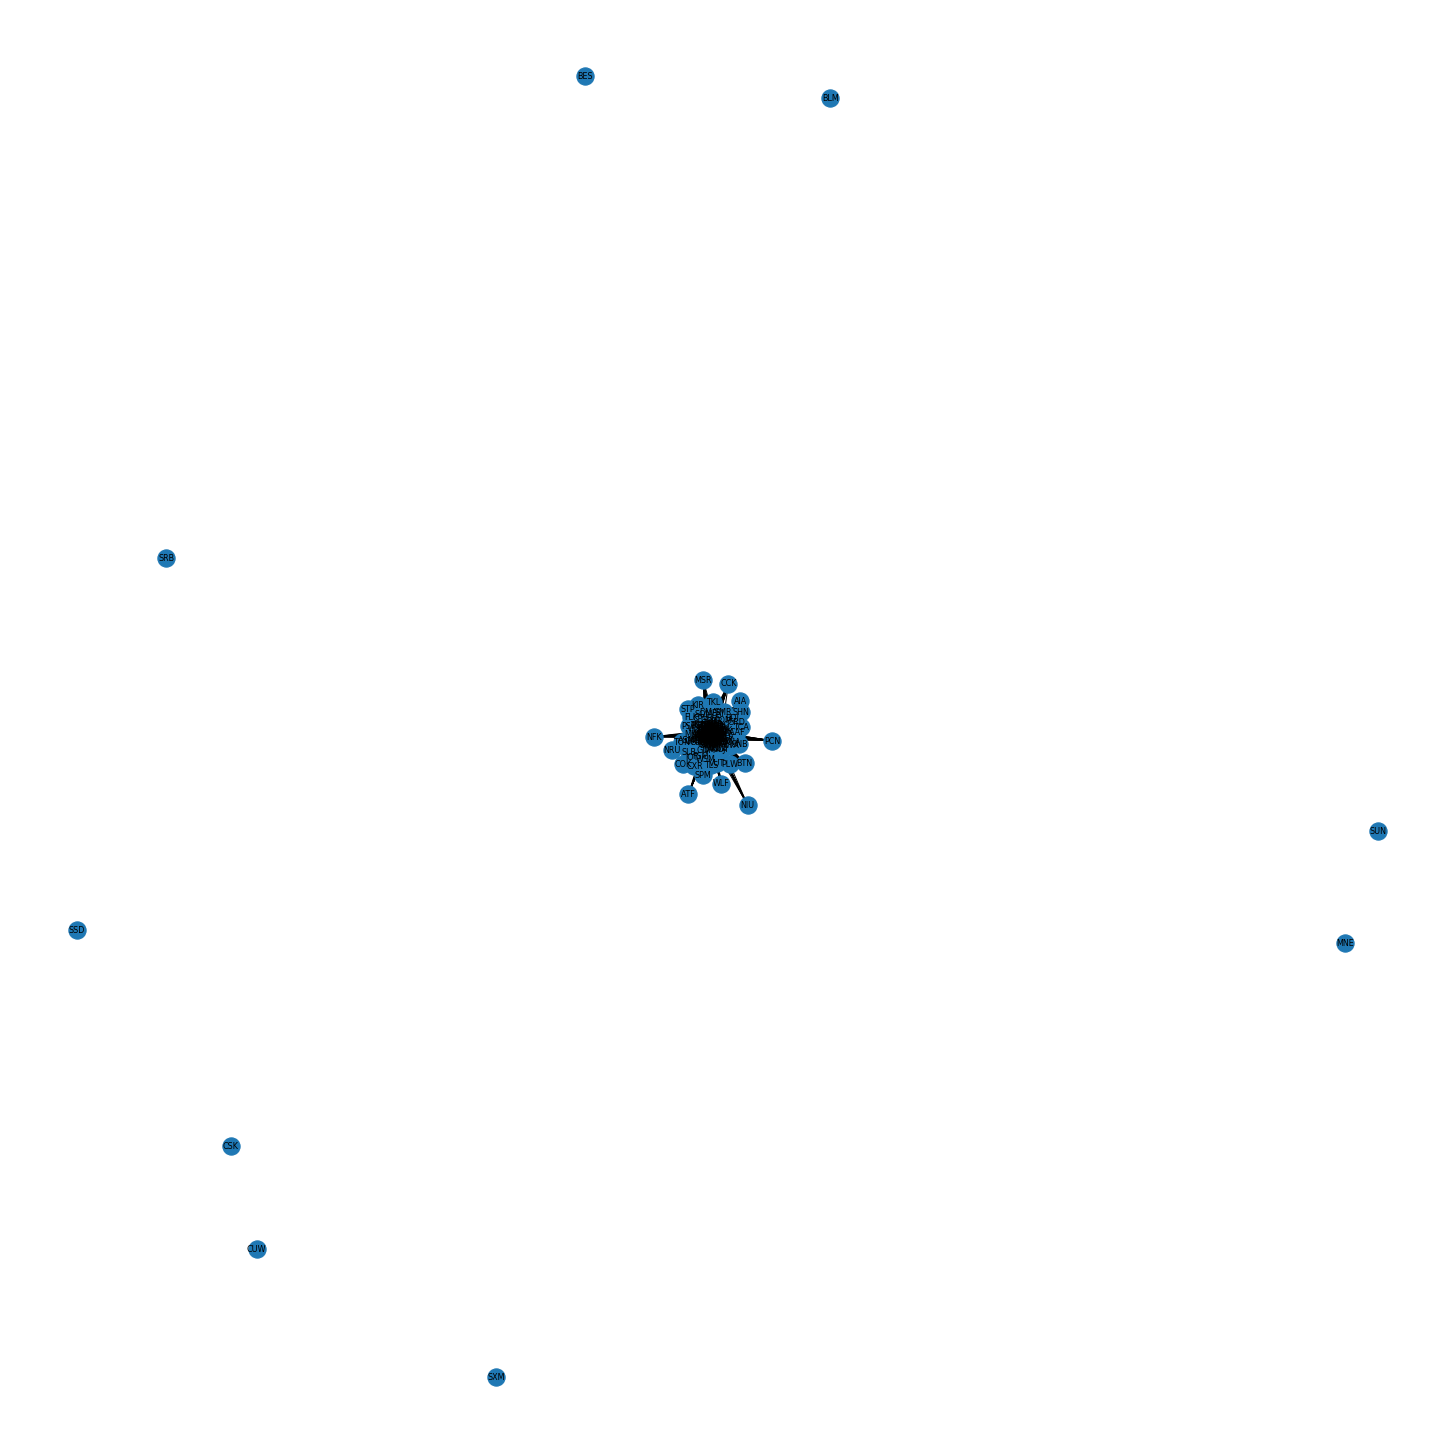

In [4]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2002_GDP=World_GDP['2002']
World_2002_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2002_GDP[i])==False:
        World_2002_dict.update({World_Country[i]:World_2002_GDP[i]})
        
BACI2002=nx.Graph()
BACI2002_NODE=countryname
for j in BACI2002_NODE:
    if type(j)!=str:
        BACI2002_NODE.remove(j)

BACI2002.add_nodes_from(BACI2002_NODE)

BACI2002_IMPORT=list(baci2002['i'])
BACI2002_EXPORT=list(baci2002['j'])
BACI2002_WEIGHT=list(baci2002['v'])

BACI2002_TRADE_LIST=[]
BACI2002_TRADE_WEIGHT_DICT={}


BACI2002_TRADE_WEIGHT_DICT={}
BACI2002_TRADE_WEIGHT_DICT.update({BACI2002_IMPORT[0]:{BACI2002_EXPORT[0]:BACI2002_WEIGHT[0]}})
    
for i in range(1,len(baci2002)):
    if (BACI2002_IMPORT[i] == BACI2002_IMPORT[i-1]) & (BACI2002_EXPORT[i] == BACI2002_EXPORT[i-1]):
        BACI2002_TRADE_WEIGHT_DICT[BACI2002_IMPORT[i]].update\
        ({BACI2002_EXPORT[i]:\
          BACI2002_TRADE_WEIGHT_DICT[BACI2002_IMPORT[i]][BACI2002_EXPORT[i]]+BACI2002_WEIGHT[i]})
    elif BACI2002_IMPORT[i] == BACI2002_IMPORT[i-1]: 
        BACI2002_TRADE_WEIGHT_DICT[BACI2002_IMPORT[i]].update({BACI2002_EXPORT[i]:BACI2002_WEIGHT[i]})
    else:
        BACI2002_TRADE_WEIGHT_DICT.update({BACI2002_IMPORT[i]:{BACI2002_EXPORT[i]:BACI2002_WEIGHT[i]}})

BACI2002_TRADING_PAIR=[]
for exporting_nation in BACI2002_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2002_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2002_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2002_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2002_TRADING_UD_PAIR={}
for i in range(len(BACI2002_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2002_TRADING_PAIR)):
        if (BACI2002_TRADING_PAIR[i][0]==BACI2002_TRADING_PAIR[j][1]) & (BACI2002_TRADING_PAIR[j][0]==BACI2002_TRADING_PAIR[i][1]):
            BACI2002_TRADING_UD_PAIR.update({(BACI2002_TRADING_PAIR[i][0],BACI2002_TRADING_PAIR[i][1]):\
                                            BACI2002_TRADING_PAIR[i][2]+BACI2002_TRADING_PAIR[j][2]})

    if ((BACI2002_TRADING_PAIR[i][0],BACI2002_TRADING_PAIR[i][1]) not in BACI2002_TRADING_UD_PAIR.keys())&\
    ((BACI2002_TRADING_PAIR[i][1],BACI2002_TRADING_PAIR[i][0]) not in BACI2002_TRADING_UD_PAIR.keys()):
            BACI2002_TRADING_UD_PAIR.update({(BACI2002_TRADING_PAIR[i][0],BACI2002_TRADING_PAIR[i][1]):\
                                            BACI2002_TRADING_PAIR[i][2]})
BACI2002_TRADING_EDGE=[]
for trade in BACI2002_TRADING_UD_PAIR:
    BACI2002_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2002_TRADING_UD_PAIR[trade]))

for trade in BACI2002_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2002_TRADING_EDGE.remove(trade)
                    
        
        
BACI2002.add_weighted_edges_from(BACI2002_TRADING_EDGE)
pos=nx.spring_layout(BACI2002,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2002,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2002=dict(nx.clustering(BACI2002,weight='weight'))

BACI2002_TRADING_COUNTRY=[]
for trading_country in BACI2002_TRADING_EDGE:
    BACI2002_TRADING_COUNTRY.append(trading_country[0])
    BACI2002_TRADING_COUNTRY.append(trading_country[1])
    
BACI2002_TRADING_COUNTRY=set(BACI2002_TRADING_COUNTRY)
BACI2002_TRADING_COUNTRY.remove(np.nan)

BACI2002_GDP={}
for trading_country in BACI2002_TRADING_COUNTRY:
    if trading_country in World_2002_dict:
     BACI2002_GDP.update({trading_country:World_2002_dict[trading_country]})





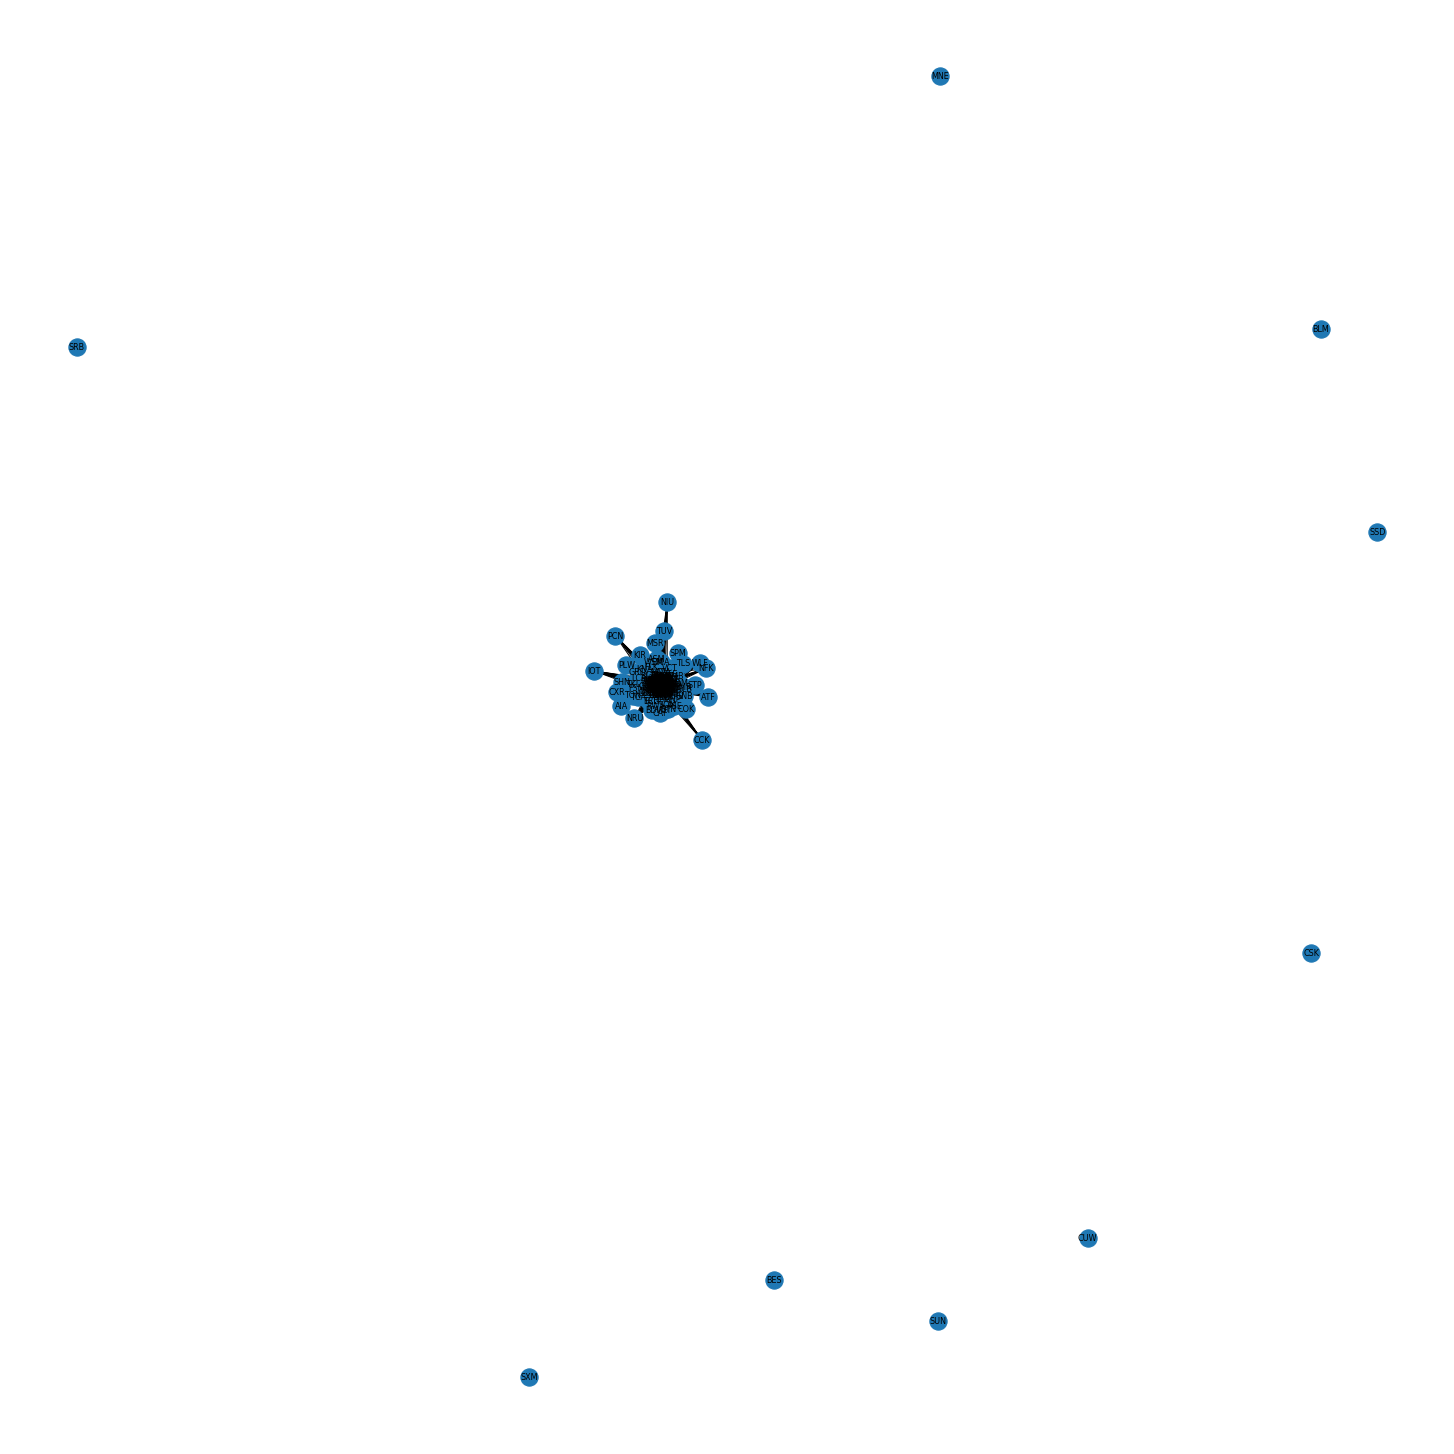

In [5]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2003_GDP=World_GDP['2003']
World_2003_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2003_GDP[i])==False:
        World_2003_dict.update({World_Country[i]:World_2003_GDP[i]})
        
BACI2003=nx.Graph()
BACI2003_NODE=countryname
if np.nan in BACI2003_NODE:
    BACI2003_NODE.remove(np.nan)

BACI2003.add_nodes_from(BACI2003_NODE)

BACI2003_IMPORT=list(baci2003['i'])
BACI2003_EXPORT=list(baci2003['j'])
BACI2003_WEIGHT=list(baci2003['v'])

BACI2003_TRADE_LIST=[]
BACI2003_TRADE_WEIGHT_DICT={}


BACI2003_TRADE_WEIGHT_DICT={}
BACI2003_TRADE_WEIGHT_DICT.update({BACI2003_IMPORT[0]:{BACI2003_EXPORT[0]:BACI2003_WEIGHT[0]}})
    
for i in range(1,len(baci2003)):
    if (BACI2003_IMPORT[i] == BACI2003_IMPORT[i-1]) & (BACI2003_EXPORT[i] == BACI2003_EXPORT[i-1]):
        BACI2003_TRADE_WEIGHT_DICT[BACI2003_IMPORT[i]].update\
        ({BACI2003_EXPORT[i]:\
          BACI2003_TRADE_WEIGHT_DICT[BACI2003_IMPORT[i]][BACI2003_EXPORT[i]]+BACI2003_WEIGHT[i]})
    elif BACI2003_IMPORT[i] == BACI2003_IMPORT[i-1]: 
        BACI2003_TRADE_WEIGHT_DICT[BACI2003_IMPORT[i]].update({BACI2003_EXPORT[i]:BACI2003_WEIGHT[i]})
    else:
        BACI2003_TRADE_WEIGHT_DICT.update({BACI2003_IMPORT[i]:{BACI2003_EXPORT[i]:BACI2003_WEIGHT[i]}})

BACI2003_TRADING_PAIR=[]
for exporting_nation in BACI2003_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2003_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2003_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2003_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2003_TRADING_UD_PAIR={}
for i in range(len(BACI2003_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2003_TRADING_PAIR)):
        if (BACI2003_TRADING_PAIR[i][0]==BACI2003_TRADING_PAIR[j][1]) & (BACI2003_TRADING_PAIR[j][0]==BACI2003_TRADING_PAIR[i][1]):
            BACI2003_TRADING_UD_PAIR.update({(BACI2003_TRADING_PAIR[i][0],BACI2003_TRADING_PAIR[i][1]):\
                                            BACI2003_TRADING_PAIR[i][2]+BACI2003_TRADING_PAIR[j][2]})

    if ((BACI2003_TRADING_PAIR[i][0],BACI2003_TRADING_PAIR[i][1]) not in BACI2003_TRADING_UD_PAIR.keys())&\
    ((BACI2003_TRADING_PAIR[i][1],BACI2003_TRADING_PAIR[i][0]) not in BACI2003_TRADING_UD_PAIR.keys()):
            BACI2003_TRADING_UD_PAIR.update({(BACI2003_TRADING_PAIR[i][0],BACI2003_TRADING_PAIR[i][1]):\
                                            BACI2003_TRADING_PAIR[i][2]})
BACI2003_TRADING_EDGE=[]
for trade in BACI2003_TRADING_UD_PAIR:
    BACI2003_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2003_TRADING_UD_PAIR[trade]))

for trade in BACI2003_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2003_TRADING_EDGE.remove(trade)
                    
        
        
BACI2003.add_weighted_edges_from(BACI2003_TRADING_EDGE)
pos=nx.spring_layout(BACI2003,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2003,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2003=dict(nx.clustering(BACI2003,weight='weight'))

BACI2003_TRADING_COUNTRY=[]
for trading_country in BACI2003_TRADING_EDGE:
    BACI2003_TRADING_COUNTRY.append(trading_country[0])
    BACI2003_TRADING_COUNTRY.append(trading_country[1])
    
BACI2003_TRADING_COUNTRY=set(BACI2003_TRADING_COUNTRY)
BACI2003_TRADING_COUNTRY.remove(np.nan)

BACI2003_GDP={}
for trading_country in BACI2003_TRADING_COUNTRY:
    if trading_country in World_2003_dict:
     BACI2003_GDP.update({trading_country:World_2003_dict[trading_country]})





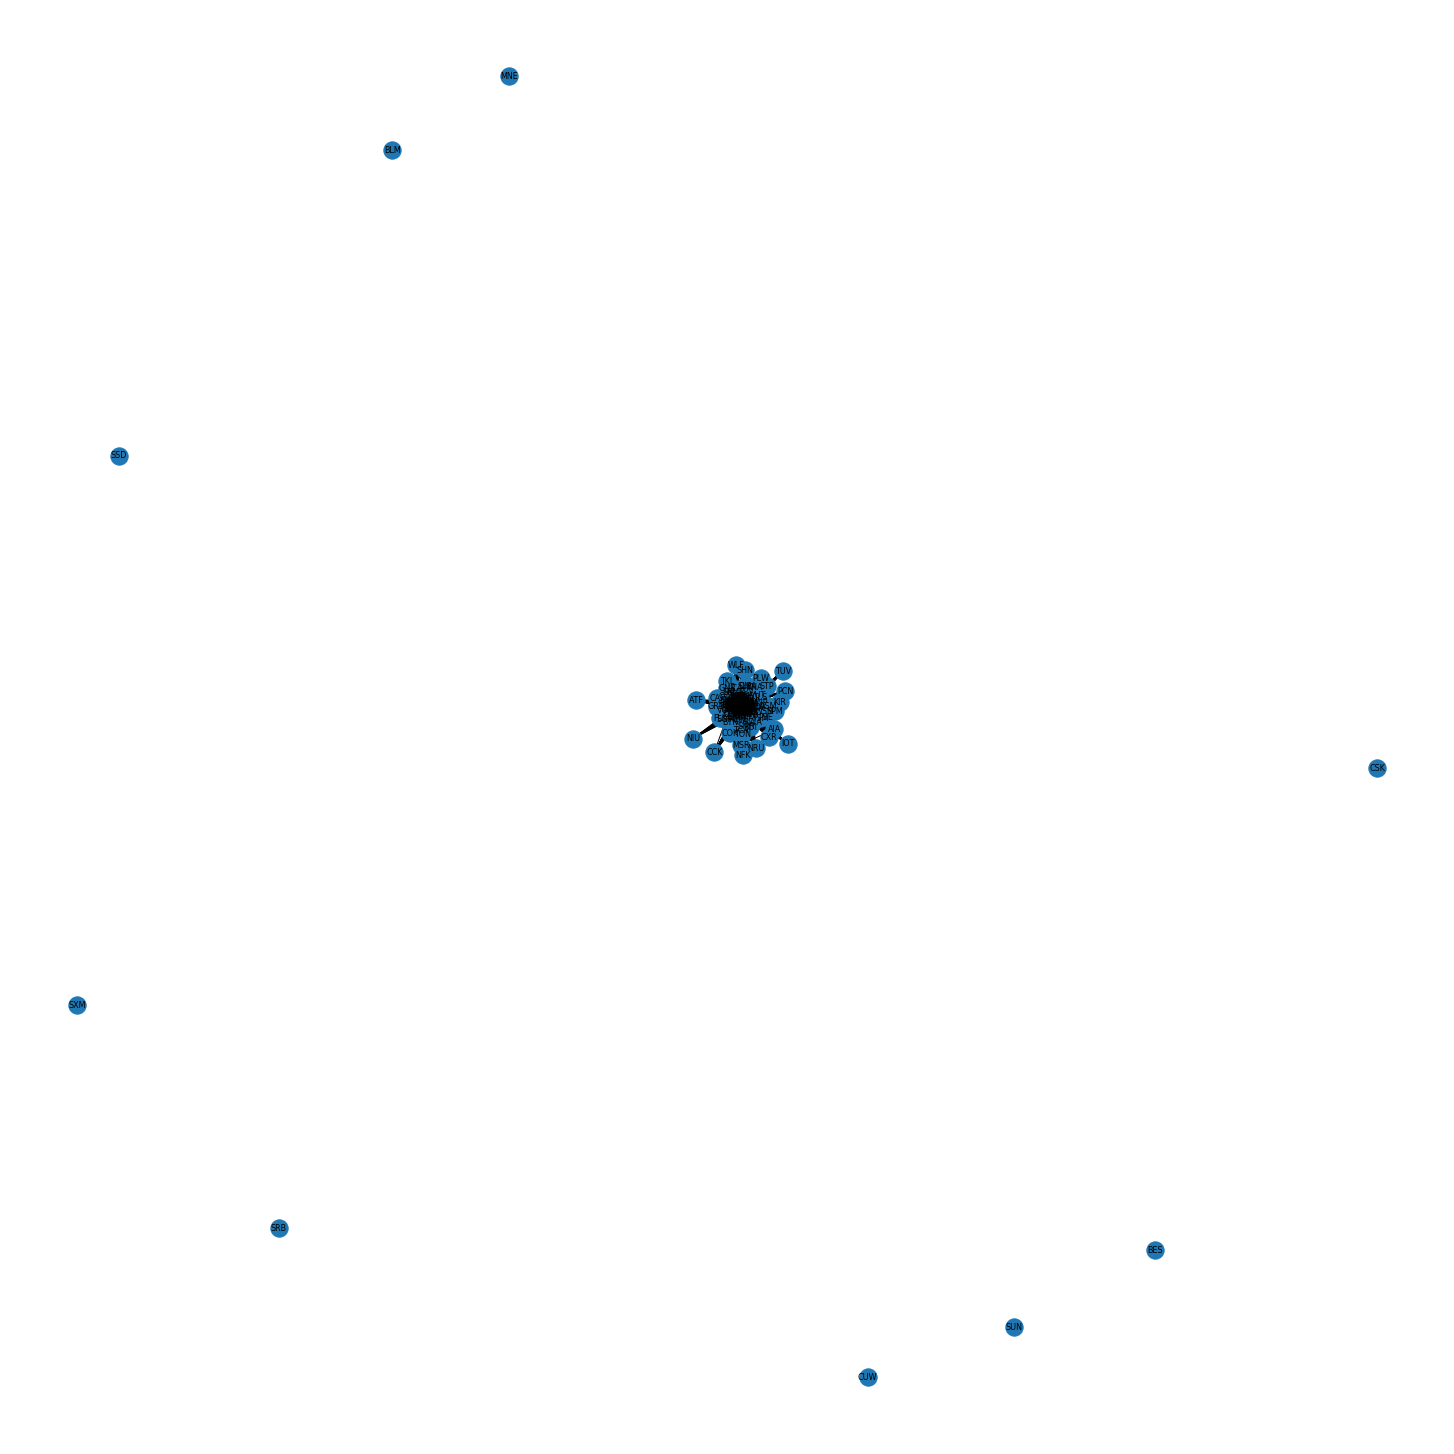

In [6]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2004_GDP=World_GDP['2004']
World_2004_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2004_GDP[i])==False:
        World_2004_dict.update({World_Country[i]:World_2004_GDP[i]})
        
BACI2004=nx.Graph()
BACI2004_NODE=countryname
if np.nan in BACI2004_NODE:
    BACI2004_NODE.remove(np.nan)

BACI2004.add_nodes_from(BACI2004_NODE)

BACI2004_IMPORT=list(baci2004['i'])
BACI2004_EXPORT=list(baci2004['j'])
BACI2004_WEIGHT=list(baci2004['v'])

BACI2004_TRADE_LIST=[]
BACI2004_TRADE_WEIGHT_DICT={}


BACI2004_TRADE_WEIGHT_DICT={}
BACI2004_TRADE_WEIGHT_DICT.update({BACI2004_IMPORT[0]:{BACI2004_EXPORT[0]:BACI2004_WEIGHT[0]}})
    
for i in range(1,len(baci2004)):
    if (BACI2004_IMPORT[i] == BACI2004_IMPORT[i-1]) & (BACI2004_EXPORT[i] == BACI2004_EXPORT[i-1]):
        BACI2004_TRADE_WEIGHT_DICT[BACI2004_IMPORT[i]].update\
        ({BACI2004_EXPORT[i]:\
          BACI2004_TRADE_WEIGHT_DICT[BACI2004_IMPORT[i]][BACI2004_EXPORT[i]]+BACI2004_WEIGHT[i]})
    elif BACI2004_IMPORT[i] == BACI2004_IMPORT[i-1]: 
        BACI2004_TRADE_WEIGHT_DICT[BACI2004_IMPORT[i]].update({BACI2004_EXPORT[i]:BACI2004_WEIGHT[i]})
    else:
        BACI2004_TRADE_WEIGHT_DICT.update({BACI2004_IMPORT[i]:{BACI2004_EXPORT[i]:BACI2004_WEIGHT[i]}})

BACI2004_TRADING_PAIR=[]
for exporting_nation in BACI2004_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2004_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2004_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2004_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2004_TRADING_UD_PAIR={}
for i in range(len(BACI2004_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2004_TRADING_PAIR)):
        if (BACI2004_TRADING_PAIR[i][0]==BACI2004_TRADING_PAIR[j][1]) & (BACI2004_TRADING_PAIR[j][0]==BACI2004_TRADING_PAIR[i][1]):
            BACI2004_TRADING_UD_PAIR.update({(BACI2004_TRADING_PAIR[i][0],BACI2004_TRADING_PAIR[i][1]):\
                                            BACI2004_TRADING_PAIR[i][2]+BACI2004_TRADING_PAIR[j][2]})

    if ((BACI2004_TRADING_PAIR[i][0],BACI2004_TRADING_PAIR[i][1]) not in BACI2004_TRADING_UD_PAIR.keys())&\
    ((BACI2004_TRADING_PAIR[i][1],BACI2004_TRADING_PAIR[i][0]) not in BACI2004_TRADING_UD_PAIR.keys()):
            BACI2004_TRADING_UD_PAIR.update({(BACI2004_TRADING_PAIR[i][0],BACI2004_TRADING_PAIR[i][1]):\
                                            BACI2004_TRADING_PAIR[i][2]})
BACI2004_TRADING_EDGE=[]
for trade in BACI2004_TRADING_UD_PAIR:
    BACI2004_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2004_TRADING_UD_PAIR[trade]))

for trade in BACI2004_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2004_TRADING_EDGE.remove(trade)
                    
        
        
BACI2004.add_weighted_edges_from(BACI2004_TRADING_EDGE)
pos=nx.spring_layout(BACI2004,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2004,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2004=dict(nx.clustering(BACI2004,weight='weight'))

BACI2004_TRADING_COUNTRY=[]
for trading_country in BACI2004_TRADING_EDGE:
    BACI2004_TRADING_COUNTRY.append(trading_country[0])
    BACI2004_TRADING_COUNTRY.append(trading_country[1])
    
BACI2004_TRADING_COUNTRY=set(BACI2004_TRADING_COUNTRY)
BACI2004_TRADING_COUNTRY.remove(np.nan)

BACI2004_GDP={}
for trading_country in BACI2004_TRADING_COUNTRY:
    if trading_country in World_2004_dict:
     BACI2004_GDP.update({trading_country:World_2004_dict[trading_country]})





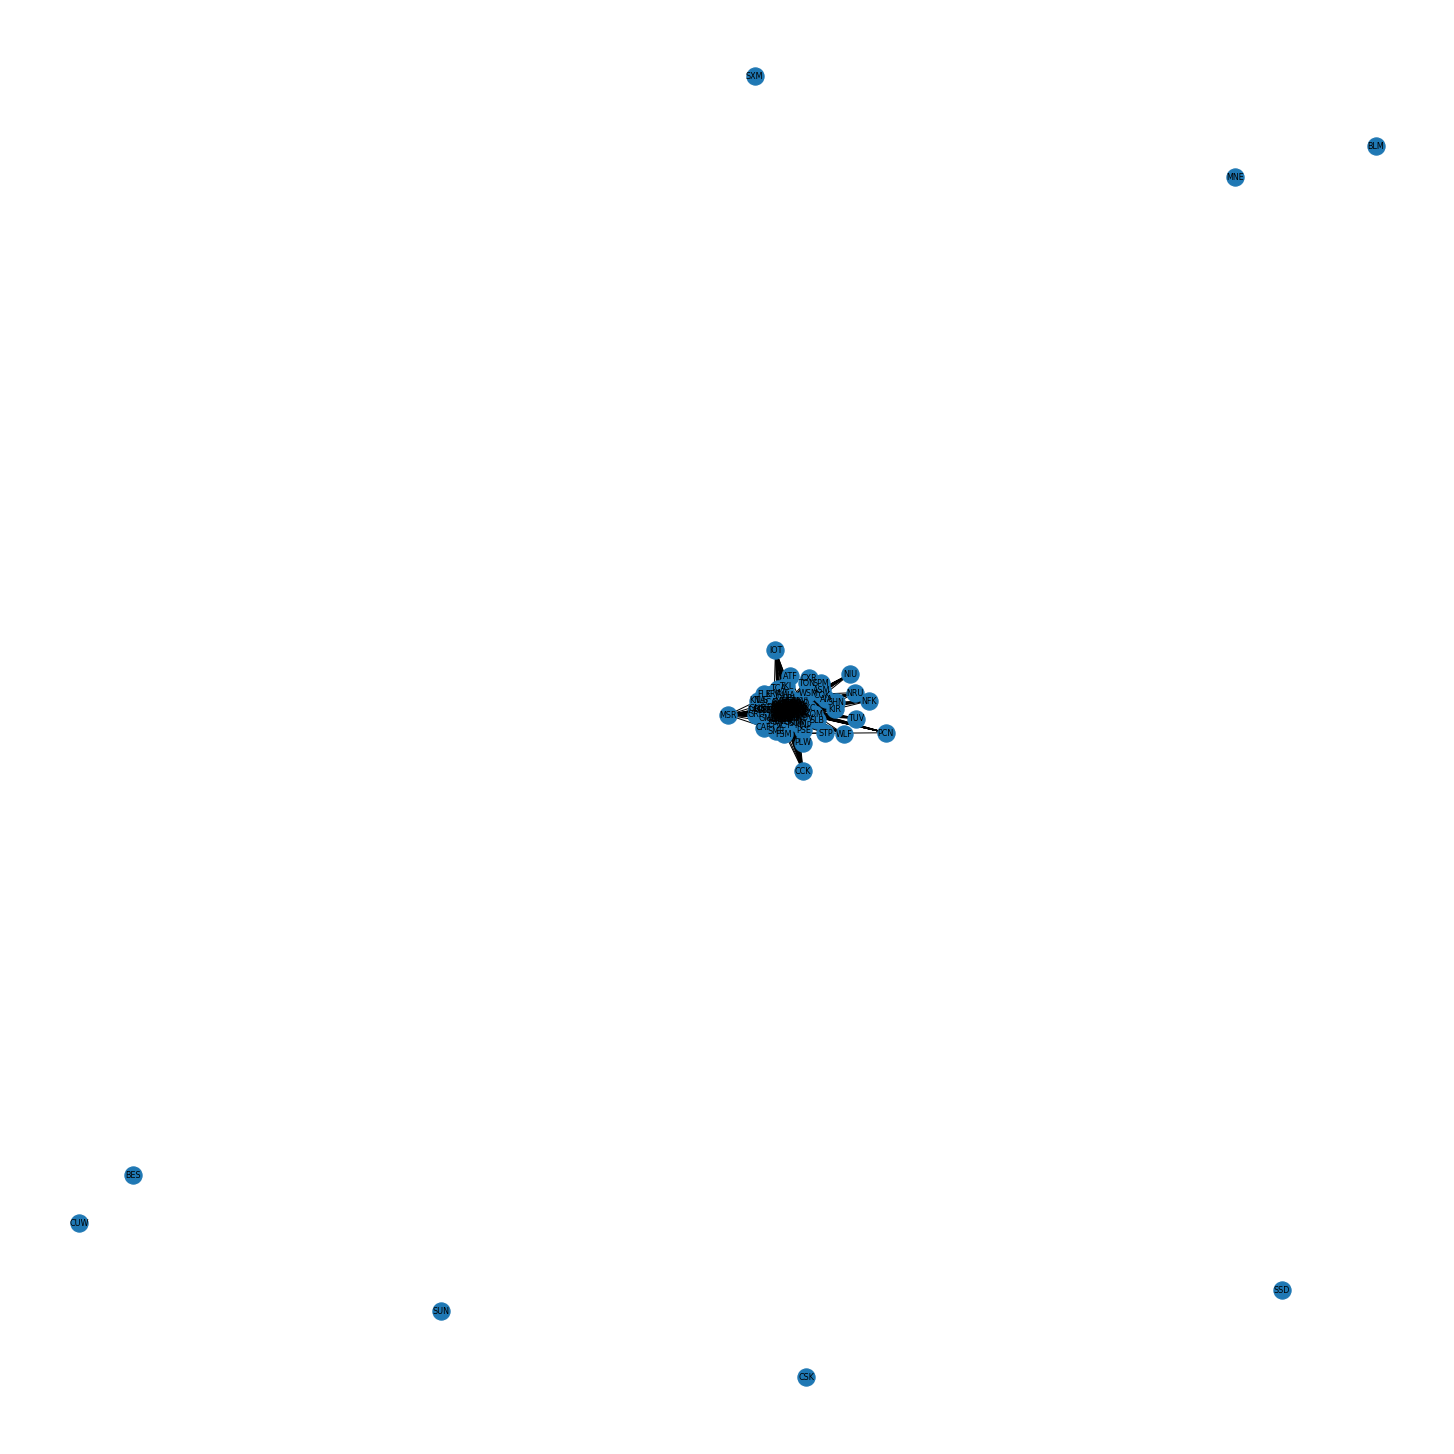

In [7]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2005_GDP=World_GDP['2005']
World_2005_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2005_GDP[i])==False:
        World_2005_dict.update({World_Country[i]:World_2005_GDP[i]})
        
BACI2005=nx.Graph()
BACI2005_NODE=countryname
if np.nan in BACI2005_NODE:
    BACI2005_NODE.remove(np.nan)

BACI2005.add_nodes_from(BACI2005_NODE)

BACI2005_IMPORT=list(baci2005['i'])
BACI2005_EXPORT=list(baci2005['j'])
BACI2005_WEIGHT=list(baci2005['v'])

BACI2005_TRADE_LIST=[]
BACI2005_TRADE_WEIGHT_DICT={}


BACI2005_TRADE_WEIGHT_DICT={}
BACI2005_TRADE_WEIGHT_DICT.update({BACI2005_IMPORT[0]:{BACI2005_EXPORT[0]:BACI2005_WEIGHT[0]}})
    
for i in range(1,len(baci2005)):
    if (BACI2005_IMPORT[i] == BACI2005_IMPORT[i-1]) & (BACI2005_EXPORT[i] == BACI2005_EXPORT[i-1]):
        BACI2005_TRADE_WEIGHT_DICT[BACI2005_IMPORT[i]].update\
        ({BACI2005_EXPORT[i]:\
          BACI2005_TRADE_WEIGHT_DICT[BACI2005_IMPORT[i]][BACI2005_EXPORT[i]]+BACI2005_WEIGHT[i]})
    elif BACI2005_IMPORT[i] == BACI2005_IMPORT[i-1]: 
        BACI2005_TRADE_WEIGHT_DICT[BACI2005_IMPORT[i]].update({BACI2005_EXPORT[i]:BACI2005_WEIGHT[i]})
    else:
        BACI2005_TRADE_WEIGHT_DICT.update({BACI2005_IMPORT[i]:{BACI2005_EXPORT[i]:BACI2005_WEIGHT[i]}})

BACI2005_TRADING_PAIR=[]
for exporting_nation in BACI2005_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2005_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2005_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2005_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2005_TRADING_UD_PAIR={}
for i in range(len(BACI2005_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2005_TRADING_PAIR)):
        if (BACI2005_TRADING_PAIR[i][0]==BACI2005_TRADING_PAIR[j][1]) & (BACI2005_TRADING_PAIR[j][0]==BACI2005_TRADING_PAIR[i][1]):
            BACI2005_TRADING_UD_PAIR.update({(BACI2005_TRADING_PAIR[i][0],BACI2005_TRADING_PAIR[i][1]):\
                                            BACI2005_TRADING_PAIR[i][2]+BACI2005_TRADING_PAIR[j][2]})

    if ((BACI2005_TRADING_PAIR[i][0],BACI2005_TRADING_PAIR[i][1]) not in BACI2005_TRADING_UD_PAIR.keys())&\
    ((BACI2005_TRADING_PAIR[i][1],BACI2005_TRADING_PAIR[i][0]) not in BACI2005_TRADING_UD_PAIR.keys()):
            BACI2005_TRADING_UD_PAIR.update({(BACI2005_TRADING_PAIR[i][0],BACI2005_TRADING_PAIR[i][1]):\
                                            BACI2005_TRADING_PAIR[i][2]})
BACI2005_TRADING_EDGE=[]
for trade in BACI2005_TRADING_UD_PAIR:
    BACI2005_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2005_TRADING_UD_PAIR[trade]))

for trade in BACI2005_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2005_TRADING_EDGE.remove(trade)
                    
        
        
BACI2005.add_weighted_edges_from(BACI2005_TRADING_EDGE)
pos=nx.spring_layout(BACI2005,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2005,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2005=dict(nx.clustering(BACI2005,weight='weight'))

BACI2005_TRADING_COUNTRY=[]
for trading_country in BACI2005_TRADING_EDGE:
    BACI2005_TRADING_COUNTRY.append(trading_country[0])
    BACI2005_TRADING_COUNTRY.append(trading_country[1])
    
BACI2005_TRADING_COUNTRY=set(BACI2005_TRADING_COUNTRY)
BACI2005_TRADING_COUNTRY.remove(np.nan)

BACI2005_GDP={}
for trading_country in BACI2005_TRADING_COUNTRY:
    if trading_country in World_2005_dict:
     BACI2005_GDP.update({trading_country:World_2005_dict[trading_country]})





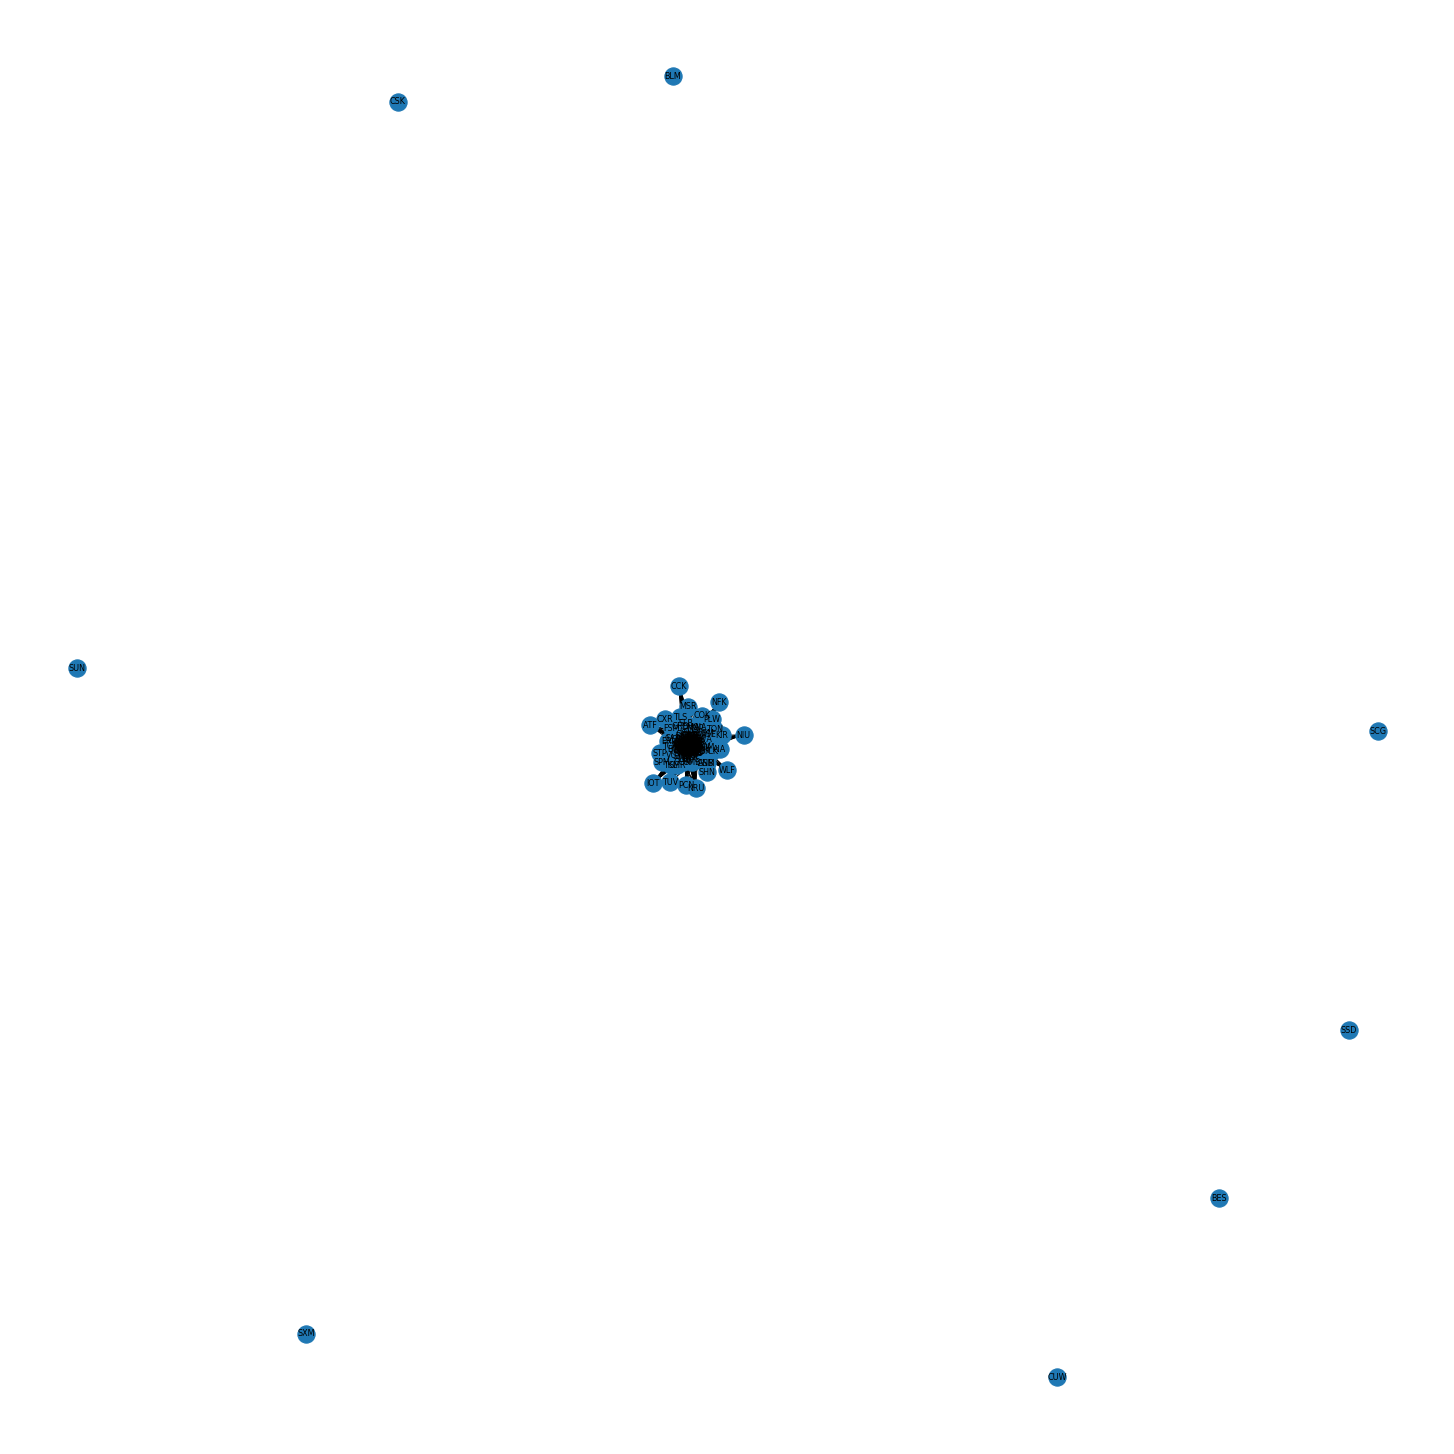

In [8]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2006_GDP=World_GDP['2006']
World_2006_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2006_GDP[i])==False:
        World_2006_dict.update({World_Country[i]:World_2006_GDP[i]})
        
BACI2006=nx.Graph()
BACI2006_NODE=countryname
if np.nan in BACI2006_NODE:
    BACI2006_NODE.remove(np.nan)

BACI2006.add_nodes_from(BACI2006_NODE)

BACI2006_IMPORT=list(baci2006['i'])
BACI2006_EXPORT=list(baci2006['j'])
BACI2006_WEIGHT=list(baci2006['v'])

BACI2006_TRADE_LIST=[]
BACI2006_TRADE_WEIGHT_DICT={}


BACI2006_TRADE_WEIGHT_DICT={}
BACI2006_TRADE_WEIGHT_DICT.update({BACI2006_IMPORT[0]:{BACI2006_EXPORT[0]:BACI2006_WEIGHT[0]}})
    
for i in range(1,len(baci2006)):
    if (BACI2006_IMPORT[i] == BACI2006_IMPORT[i-1]) & (BACI2006_EXPORT[i] == BACI2006_EXPORT[i-1]):
        BACI2006_TRADE_WEIGHT_DICT[BACI2006_IMPORT[i]].update\
        ({BACI2006_EXPORT[i]:\
          BACI2006_TRADE_WEIGHT_DICT[BACI2006_IMPORT[i]][BACI2006_EXPORT[i]]+BACI2006_WEIGHT[i]})
    elif BACI2006_IMPORT[i] == BACI2006_IMPORT[i-1]: 
        BACI2006_TRADE_WEIGHT_DICT[BACI2006_IMPORT[i]].update({BACI2006_EXPORT[i]:BACI2006_WEIGHT[i]})
    else:
        BACI2006_TRADE_WEIGHT_DICT.update({BACI2006_IMPORT[i]:{BACI2006_EXPORT[i]:BACI2006_WEIGHT[i]}})

BACI2006_TRADING_PAIR=[]
for exporting_nation in BACI2006_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2006_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2006_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2006_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2006_TRADING_UD_PAIR={}
for i in range(len(BACI2006_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2006_TRADING_PAIR)):
        if (BACI2006_TRADING_PAIR[i][0]==BACI2006_TRADING_PAIR[j][1]) & (BACI2006_TRADING_PAIR[j][0]==BACI2006_TRADING_PAIR[i][1]):
            BACI2006_TRADING_UD_PAIR.update({(BACI2006_TRADING_PAIR[i][0],BACI2006_TRADING_PAIR[i][1]):\
                                            BACI2006_TRADING_PAIR[i][2]+BACI2006_TRADING_PAIR[j][2]})

    if ((BACI2006_TRADING_PAIR[i][0],BACI2006_TRADING_PAIR[i][1]) not in BACI2006_TRADING_UD_PAIR.keys())&\
    ((BACI2006_TRADING_PAIR[i][1],BACI2006_TRADING_PAIR[i][0]) not in BACI2006_TRADING_UD_PAIR.keys()):
            BACI2006_TRADING_UD_PAIR.update({(BACI2006_TRADING_PAIR[i][0],BACI2006_TRADING_PAIR[i][1]):\
                                            BACI2006_TRADING_PAIR[i][2]})
BACI2006_TRADING_EDGE=[]
for trade in BACI2006_TRADING_UD_PAIR:
    BACI2006_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2006_TRADING_UD_PAIR[trade]))

for trade in BACI2006_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2006_TRADING_EDGE.remove(trade)
                    
        
        
BACI2006.add_weighted_edges_from(BACI2006_TRADING_EDGE)
pos=nx.spring_layout(BACI2006,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2006,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2006=dict(nx.clustering(BACI2006,weight='weight'))

BACI2006_TRADING_COUNTRY=[]
for trading_country in BACI2006_TRADING_EDGE:
    BACI2006_TRADING_COUNTRY.append(trading_country[0])
    BACI2006_TRADING_COUNTRY.append(trading_country[1])
    
BACI2006_TRADING_COUNTRY=set(BACI2006_TRADING_COUNTRY)
BACI2006_TRADING_COUNTRY.remove(np.nan)

BACI2006_GDP={}
for trading_country in BACI2006_TRADING_COUNTRY:
    if trading_country in World_2006_dict:
     BACI2006_GDP.update({trading_country:World_2006_dict[trading_country]})





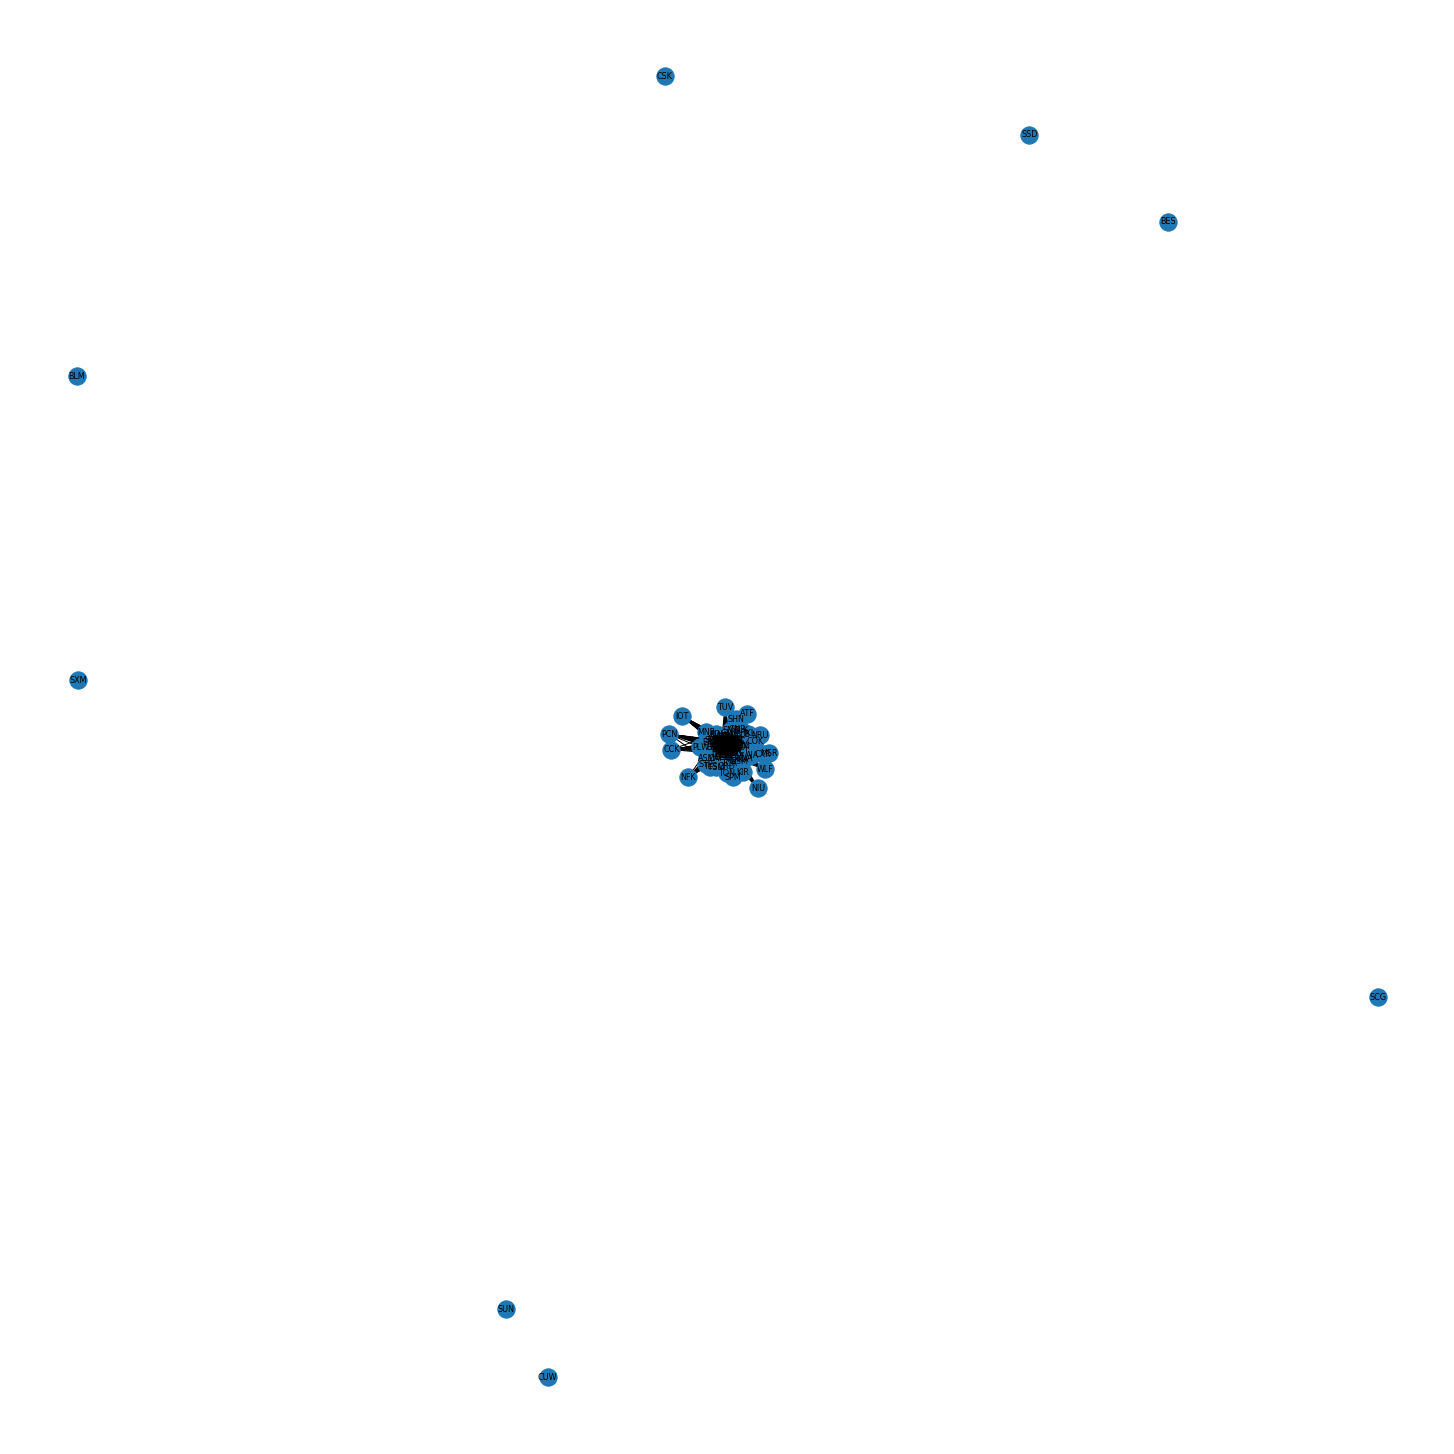

In [9]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2007_GDP=World_GDP['2007']
World_2007_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2007_GDP[i])==False:
        World_2007_dict.update({World_Country[i]:World_2007_GDP[i]})
        
BACI2007=nx.Graph()
BACI2007_NODE=countryname
if np.nan in BACI2007_NODE:
    BACI2007_NODE.remove(np.nan)

BACI2007.add_nodes_from(BACI2007_NODE)

BACI2007_IMPORT=list(baci2007['i'])
BACI2007_EXPORT=list(baci2007['j'])
BACI2007_WEIGHT=list(baci2007['v'])

BACI2007_TRADE_LIST=[]
BACI2007_TRADE_WEIGHT_DICT={}


BACI2007_TRADE_WEIGHT_DICT={}
BACI2007_TRADE_WEIGHT_DICT.update({BACI2007_IMPORT[0]:{BACI2007_EXPORT[0]:BACI2007_WEIGHT[0]}})
    
for i in range(1,len(baci2007)):
    if (BACI2007_IMPORT[i] == BACI2007_IMPORT[i-1]) & (BACI2007_EXPORT[i] == BACI2007_EXPORT[i-1]):
        BACI2007_TRADE_WEIGHT_DICT[BACI2007_IMPORT[i]].update\
        ({BACI2007_EXPORT[i]:\
          BACI2007_TRADE_WEIGHT_DICT[BACI2007_IMPORT[i]][BACI2007_EXPORT[i]]+BACI2007_WEIGHT[i]})
    elif BACI2007_IMPORT[i] == BACI2007_IMPORT[i-1]: 
        BACI2007_TRADE_WEIGHT_DICT[BACI2007_IMPORT[i]].update({BACI2007_EXPORT[i]:BACI2007_WEIGHT[i]})
    else:
        BACI2007_TRADE_WEIGHT_DICT.update({BACI2007_IMPORT[i]:{BACI2007_EXPORT[i]:BACI2007_WEIGHT[i]}})

BACI2007_TRADING_PAIR=[]
for exporting_nation in BACI2007_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2007_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2007_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2007_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2007_TRADING_UD_PAIR={}
for i in range(len(BACI2007_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2007_TRADING_PAIR)):
        if (BACI2007_TRADING_PAIR[i][0]==BACI2007_TRADING_PAIR[j][1]) & (BACI2007_TRADING_PAIR[j][0]==BACI2007_TRADING_PAIR[i][1]):
            BACI2007_TRADING_UD_PAIR.update({(BACI2007_TRADING_PAIR[i][0],BACI2007_TRADING_PAIR[i][1]):\
                                            BACI2007_TRADING_PAIR[i][2]+BACI2007_TRADING_PAIR[j][2]})

    if ((BACI2007_TRADING_PAIR[i][0],BACI2007_TRADING_PAIR[i][1]) not in BACI2007_TRADING_UD_PAIR.keys())&\
    ((BACI2007_TRADING_PAIR[i][1],BACI2007_TRADING_PAIR[i][0]) not in BACI2007_TRADING_UD_PAIR.keys()):
            BACI2007_TRADING_UD_PAIR.update({(BACI2007_TRADING_PAIR[i][0],BACI2007_TRADING_PAIR[i][1]):\
                                            BACI2007_TRADING_PAIR[i][2]})
BACI2007_TRADING_EDGE=[]
for trade in BACI2007_TRADING_UD_PAIR:
    BACI2007_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2007_TRADING_UD_PAIR[trade]))

for trade in BACI2007_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2007_TRADING_EDGE.remove(trade)
                    
        
        
BACI2007.add_weighted_edges_from(BACI2007_TRADING_EDGE)
pos=nx.spring_layout(BACI2007,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2007,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2007=dict(nx.clustering(BACI2007,weight='weight'))

BACI2007_TRADING_COUNTRY=[]
for trading_country in BACI2007_TRADING_EDGE:
    BACI2007_TRADING_COUNTRY.append(trading_country[0])
    BACI2007_TRADING_COUNTRY.append(trading_country[1])
    
BACI2007_TRADING_COUNTRY=set(BACI2007_TRADING_COUNTRY)
BACI2007_TRADING_COUNTRY.remove(np.nan)

BACI2007_GDP={}
for trading_country in BACI2007_TRADING_COUNTRY:
    if trading_country in World_2007_dict:
     BACI2007_GDP.update({trading_country:World_2007_dict[trading_country]})





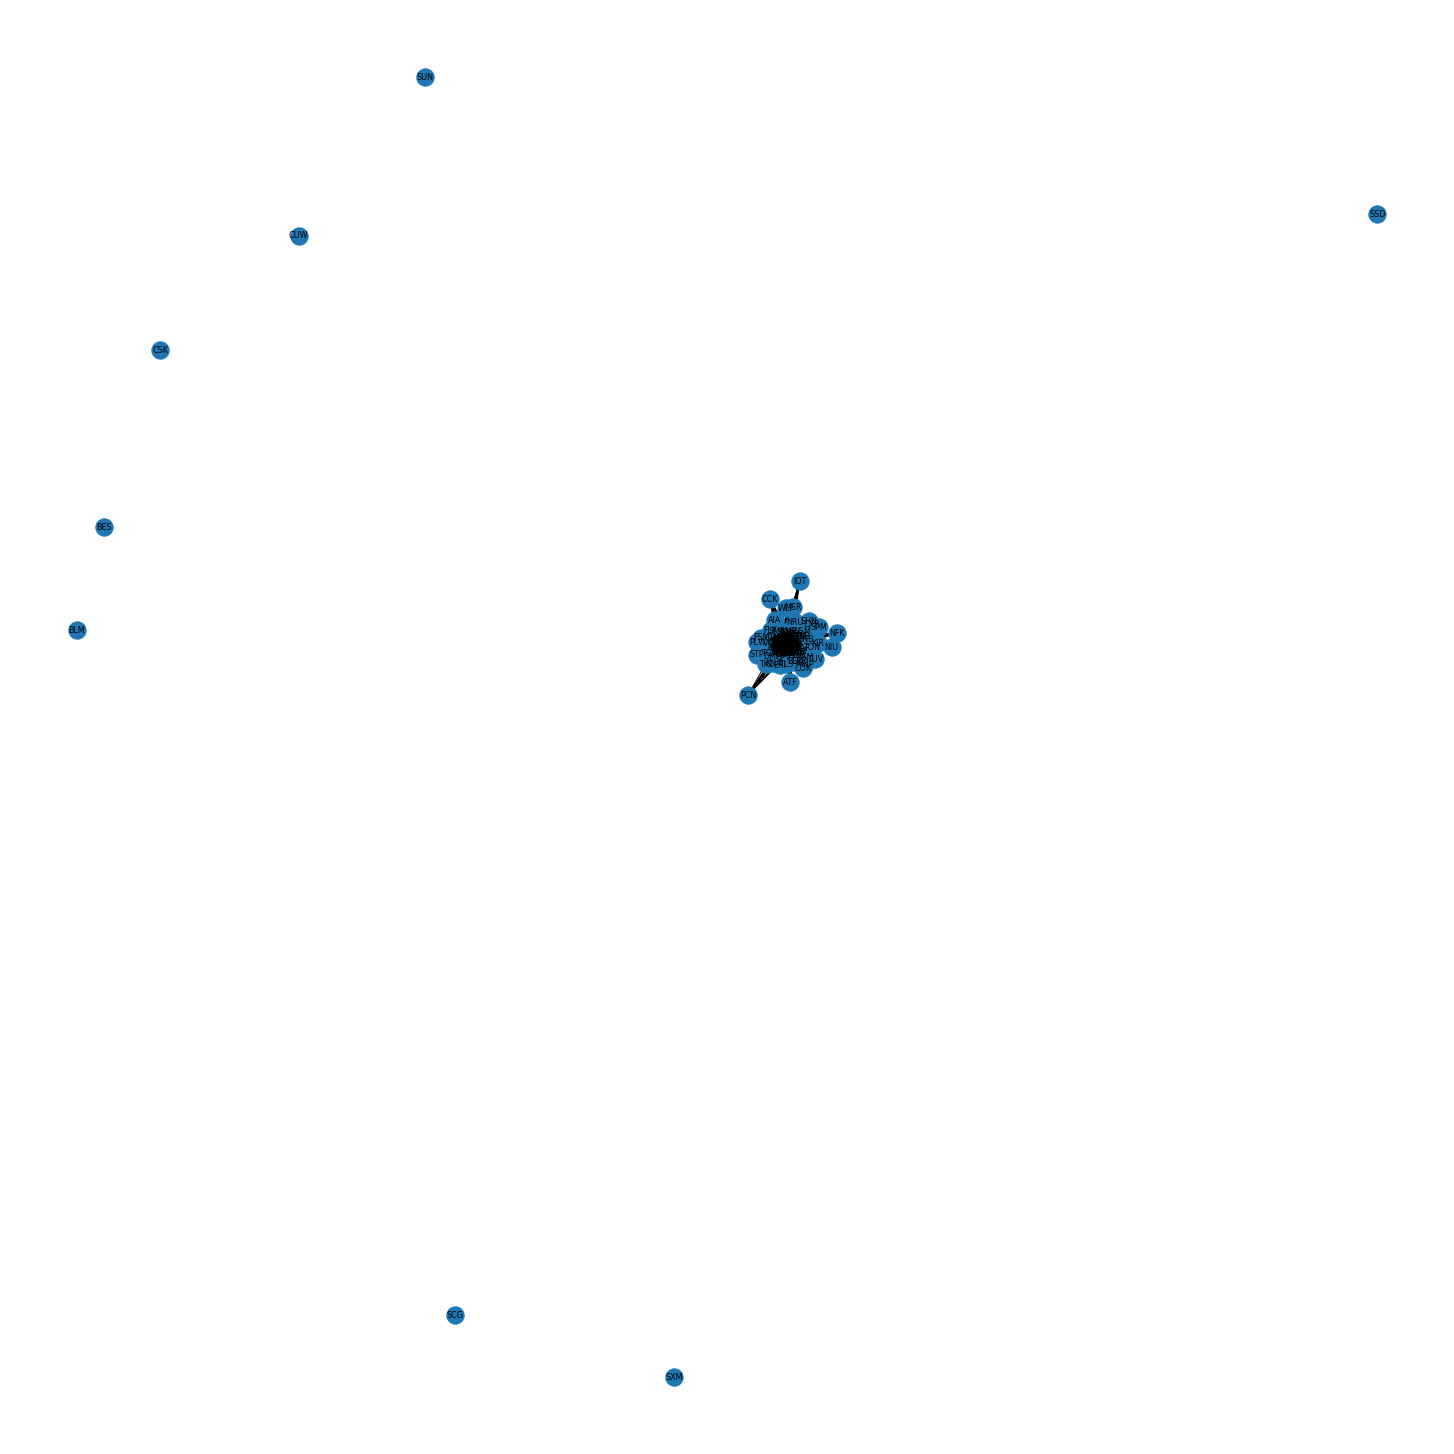

In [10]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2008_GDP=World_GDP['2008']
World_2008_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2008_GDP[i])==False:
        World_2008_dict.update({World_Country[i]:World_2008_GDP[i]})
        
BACI2008=nx.Graph()
BACI2008_NODE=countryname
if np.nan in BACI2008_NODE:
    BACI2008_NODE.remove(np.nan)

BACI2008.add_nodes_from(BACI2008_NODE)

BACI2008_IMPORT=list(baci2008['i'])
BACI2008_EXPORT=list(baci2008['j'])
BACI2008_WEIGHT=list(baci2008['v'])

BACI2008_TRADE_LIST=[]
BACI2008_TRADE_WEIGHT_DICT={}


BACI2008_TRADE_WEIGHT_DICT={}
BACI2008_TRADE_WEIGHT_DICT.update({BACI2008_IMPORT[0]:{BACI2008_EXPORT[0]:BACI2008_WEIGHT[0]}})
    
for i in range(1,len(baci2008)):
    if (BACI2008_IMPORT[i] == BACI2008_IMPORT[i-1]) & (BACI2008_EXPORT[i] == BACI2008_EXPORT[i-1]):
        BACI2008_TRADE_WEIGHT_DICT[BACI2008_IMPORT[i]].update\
        ({BACI2008_EXPORT[i]:\
          BACI2008_TRADE_WEIGHT_DICT[BACI2008_IMPORT[i]][BACI2008_EXPORT[i]]+BACI2008_WEIGHT[i]})
    elif BACI2008_IMPORT[i] == BACI2008_IMPORT[i-1]: 
        BACI2008_TRADE_WEIGHT_DICT[BACI2008_IMPORT[i]].update({BACI2008_EXPORT[i]:BACI2008_WEIGHT[i]})
    else:
        BACI2008_TRADE_WEIGHT_DICT.update({BACI2008_IMPORT[i]:{BACI2008_EXPORT[i]:BACI2008_WEIGHT[i]}})

BACI2008_TRADING_PAIR=[]
for exporting_nation in BACI2008_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2008_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2008_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2008_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2008_TRADING_UD_PAIR={}
for i in range(len(BACI2008_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2008_TRADING_PAIR)):
        if (BACI2008_TRADING_PAIR[i][0]==BACI2008_TRADING_PAIR[j][1]) & (BACI2008_TRADING_PAIR[j][0]==BACI2008_TRADING_PAIR[i][1]):
            BACI2008_TRADING_UD_PAIR.update({(BACI2008_TRADING_PAIR[i][0],BACI2008_TRADING_PAIR[i][1]):\
                                            BACI2008_TRADING_PAIR[i][2]+BACI2008_TRADING_PAIR[j][2]})

    if ((BACI2008_TRADING_PAIR[i][0],BACI2008_TRADING_PAIR[i][1]) not in BACI2008_TRADING_UD_PAIR.keys())&\
    ((BACI2008_TRADING_PAIR[i][1],BACI2008_TRADING_PAIR[i][0]) not in BACI2008_TRADING_UD_PAIR.keys()):
            BACI2008_TRADING_UD_PAIR.update({(BACI2008_TRADING_PAIR[i][0],BACI2008_TRADING_PAIR[i][1]):\
                                            BACI2008_TRADING_PAIR[i][2]})
BACI2008_TRADING_EDGE=[]
for trade in BACI2008_TRADING_UD_PAIR:
    BACI2008_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2008_TRADING_UD_PAIR[trade]))

for trade in BACI2008_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2008_TRADING_EDGE.remove(trade)
                    
        
        
BACI2008.add_weighted_edges_from(BACI2008_TRADING_EDGE)
pos=nx.spring_layout(BACI2008,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2008,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2008=dict(nx.clustering(BACI2008,weight='weight'))

BACI2008_TRADING_COUNTRY=[]
for trading_country in BACI2008_TRADING_EDGE:
    BACI2008_TRADING_COUNTRY.append(trading_country[0])
    BACI2008_TRADING_COUNTRY.append(trading_country[1])
    
BACI2008_TRADING_COUNTRY=set(BACI2008_TRADING_COUNTRY)
BACI2008_TRADING_COUNTRY.remove(np.nan)

BACI2008_GDP={}
for trading_country in BACI2008_TRADING_COUNTRY:
    if trading_country in World_2008_dict:
     BACI2008_GDP.update({trading_country:World_2008_dict[trading_country]})





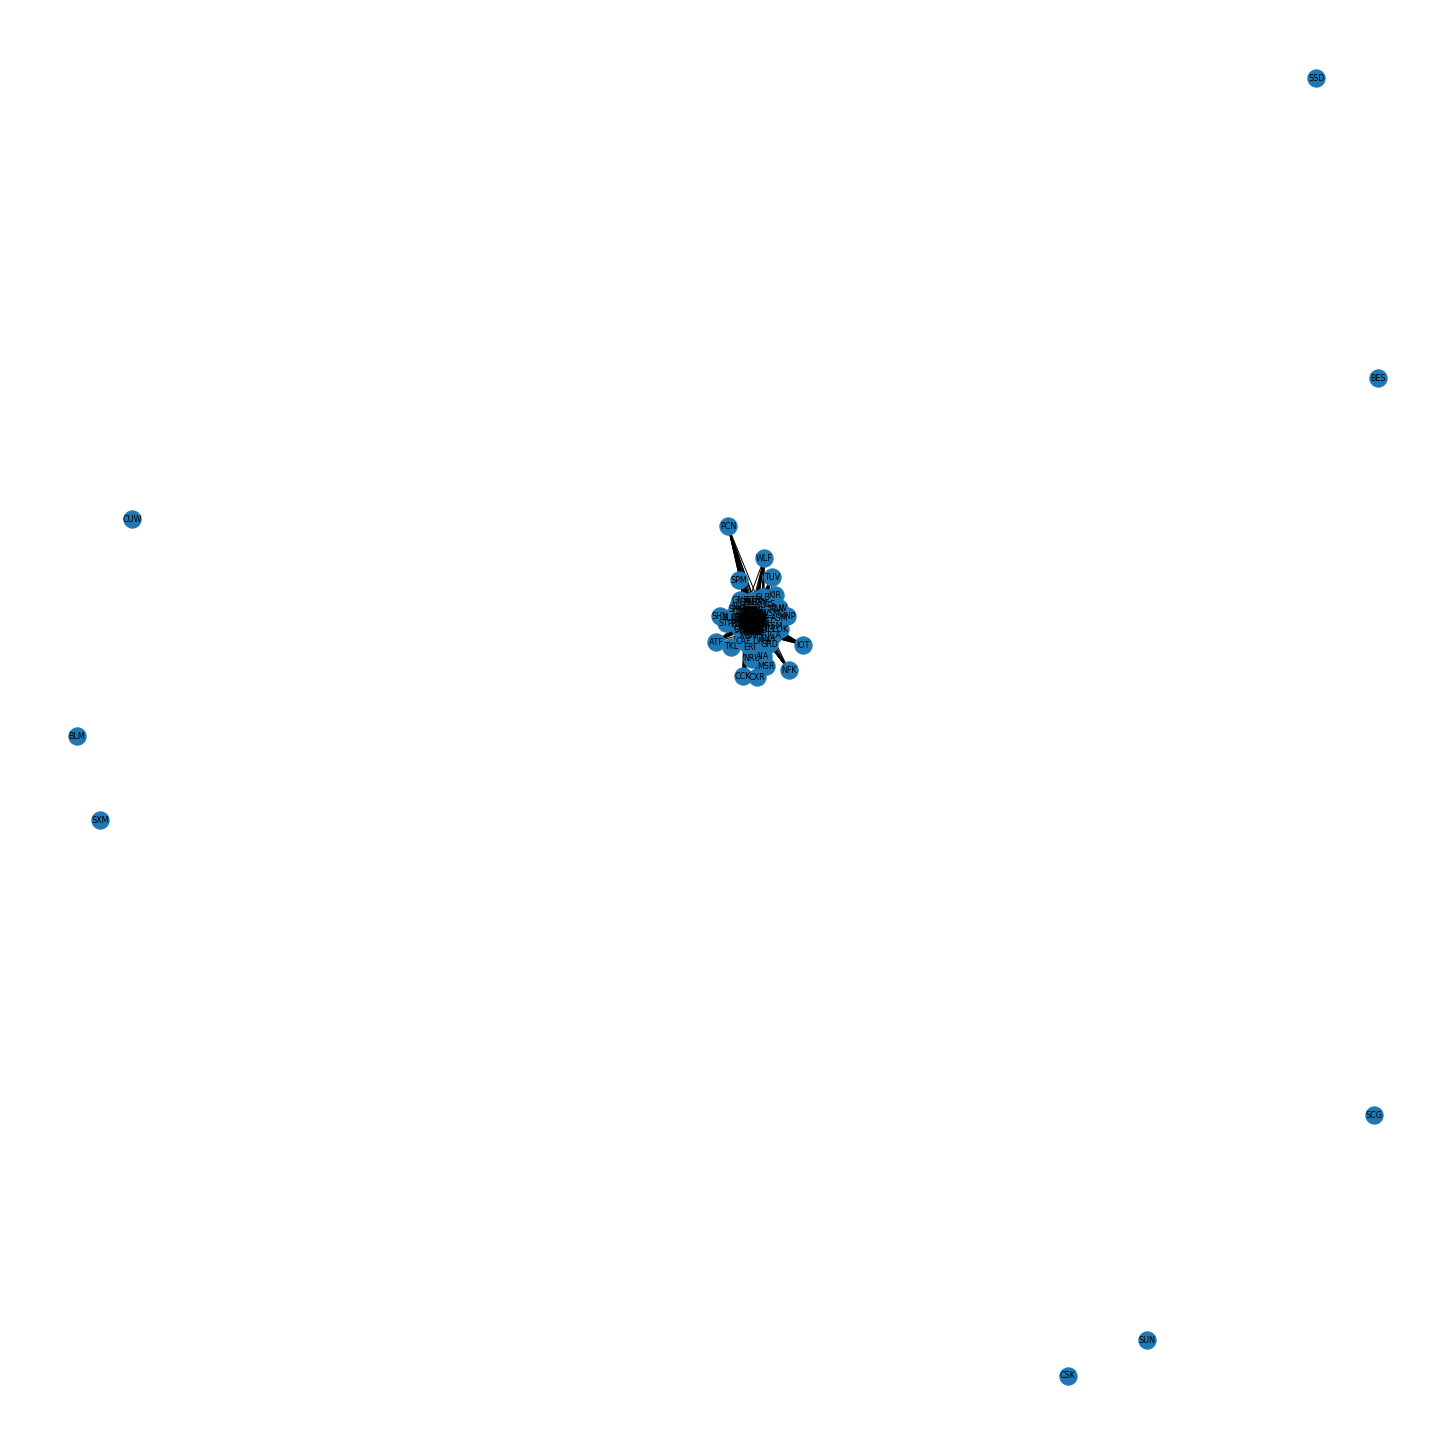

In [11]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2009_GDP=World_GDP['2009']
World_2009_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2009_GDP[i])==False:
        World_2009_dict.update({World_Country[i]:World_2009_GDP[i]})
        
BACI2009=nx.Graph()
BACI2009_NODE=countryname
if np.nan in BACI2009_NODE:
    BACI2009_NODE.remove(np.nan)

BACI2009.add_nodes_from(BACI2009_NODE)

BACI2009_IMPORT=list(baci2009['i'])
BACI2009_EXPORT=list(baci2009['j'])
BACI2009_WEIGHT=list(baci2009['v'])

BACI2009_TRADE_LIST=[]
BACI2009_TRADE_WEIGHT_DICT={}


BACI2009_TRADE_WEIGHT_DICT={}
BACI2009_TRADE_WEIGHT_DICT.update({BACI2009_IMPORT[0]:{BACI2009_EXPORT[0]:BACI2009_WEIGHT[0]}})
    
for i in range(1,len(baci2009)):
    if (BACI2009_IMPORT[i] == BACI2009_IMPORT[i-1]) & (BACI2009_EXPORT[i] == BACI2009_EXPORT[i-1]):
        BACI2009_TRADE_WEIGHT_DICT[BACI2009_IMPORT[i]].update\
        ({BACI2009_EXPORT[i]:\
          BACI2009_TRADE_WEIGHT_DICT[BACI2009_IMPORT[i]][BACI2009_EXPORT[i]]+BACI2009_WEIGHT[i]})
    elif BACI2009_IMPORT[i] == BACI2009_IMPORT[i-1]: 
        BACI2009_TRADE_WEIGHT_DICT[BACI2009_IMPORT[i]].update({BACI2009_EXPORT[i]:BACI2009_WEIGHT[i]})
    else:
        BACI2009_TRADE_WEIGHT_DICT.update({BACI2009_IMPORT[i]:{BACI2009_EXPORT[i]:BACI2009_WEIGHT[i]}})

BACI2009_TRADING_PAIR=[]
for exporting_nation in BACI2009_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2009_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2009_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2009_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2009_TRADING_UD_PAIR={}
for i in range(len(BACI2009_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2009_TRADING_PAIR)):
        if (BACI2009_TRADING_PAIR[i][0]==BACI2009_TRADING_PAIR[j][1]) & (BACI2009_TRADING_PAIR[j][0]==BACI2009_TRADING_PAIR[i][1]):
            BACI2009_TRADING_UD_PAIR.update({(BACI2009_TRADING_PAIR[i][0],BACI2009_TRADING_PAIR[i][1]):\
                                            BACI2009_TRADING_PAIR[i][2]+BACI2009_TRADING_PAIR[j][2]})

    if ((BACI2009_TRADING_PAIR[i][0],BACI2009_TRADING_PAIR[i][1]) not in BACI2009_TRADING_UD_PAIR.keys())&\
    ((BACI2009_TRADING_PAIR[i][1],BACI2009_TRADING_PAIR[i][0]) not in BACI2009_TRADING_UD_PAIR.keys()):
            BACI2009_TRADING_UD_PAIR.update({(BACI2009_TRADING_PAIR[i][0],BACI2009_TRADING_PAIR[i][1]):\
                                            BACI2009_TRADING_PAIR[i][2]})
BACI2009_TRADING_EDGE=[]
for trade in BACI2009_TRADING_UD_PAIR:
    BACI2009_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2009_TRADING_UD_PAIR[trade]))

for trade in BACI2009_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2009_TRADING_EDGE.remove(trade)
                    
        
        
BACI2009.add_weighted_edges_from(BACI2009_TRADING_EDGE)
pos=nx.spring_layout(BACI2009,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2009,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2009=dict(nx.clustering(BACI2009,weight='weight'))

BACI2009_TRADING_COUNTRY=[]
for trading_country in BACI2009_TRADING_EDGE:
    BACI2009_TRADING_COUNTRY.append(trading_country[0])
    BACI2009_TRADING_COUNTRY.append(trading_country[1])
    
BACI2009_TRADING_COUNTRY=set(BACI2009_TRADING_COUNTRY)
BACI2009_TRADING_COUNTRY.remove(np.nan)

BACI2009_GDP={}
for trading_country in BACI2009_TRADING_COUNTRY:
    if trading_country in World_2009_dict:
     BACI2009_GDP.update({trading_country:World_2009_dict[trading_country]})





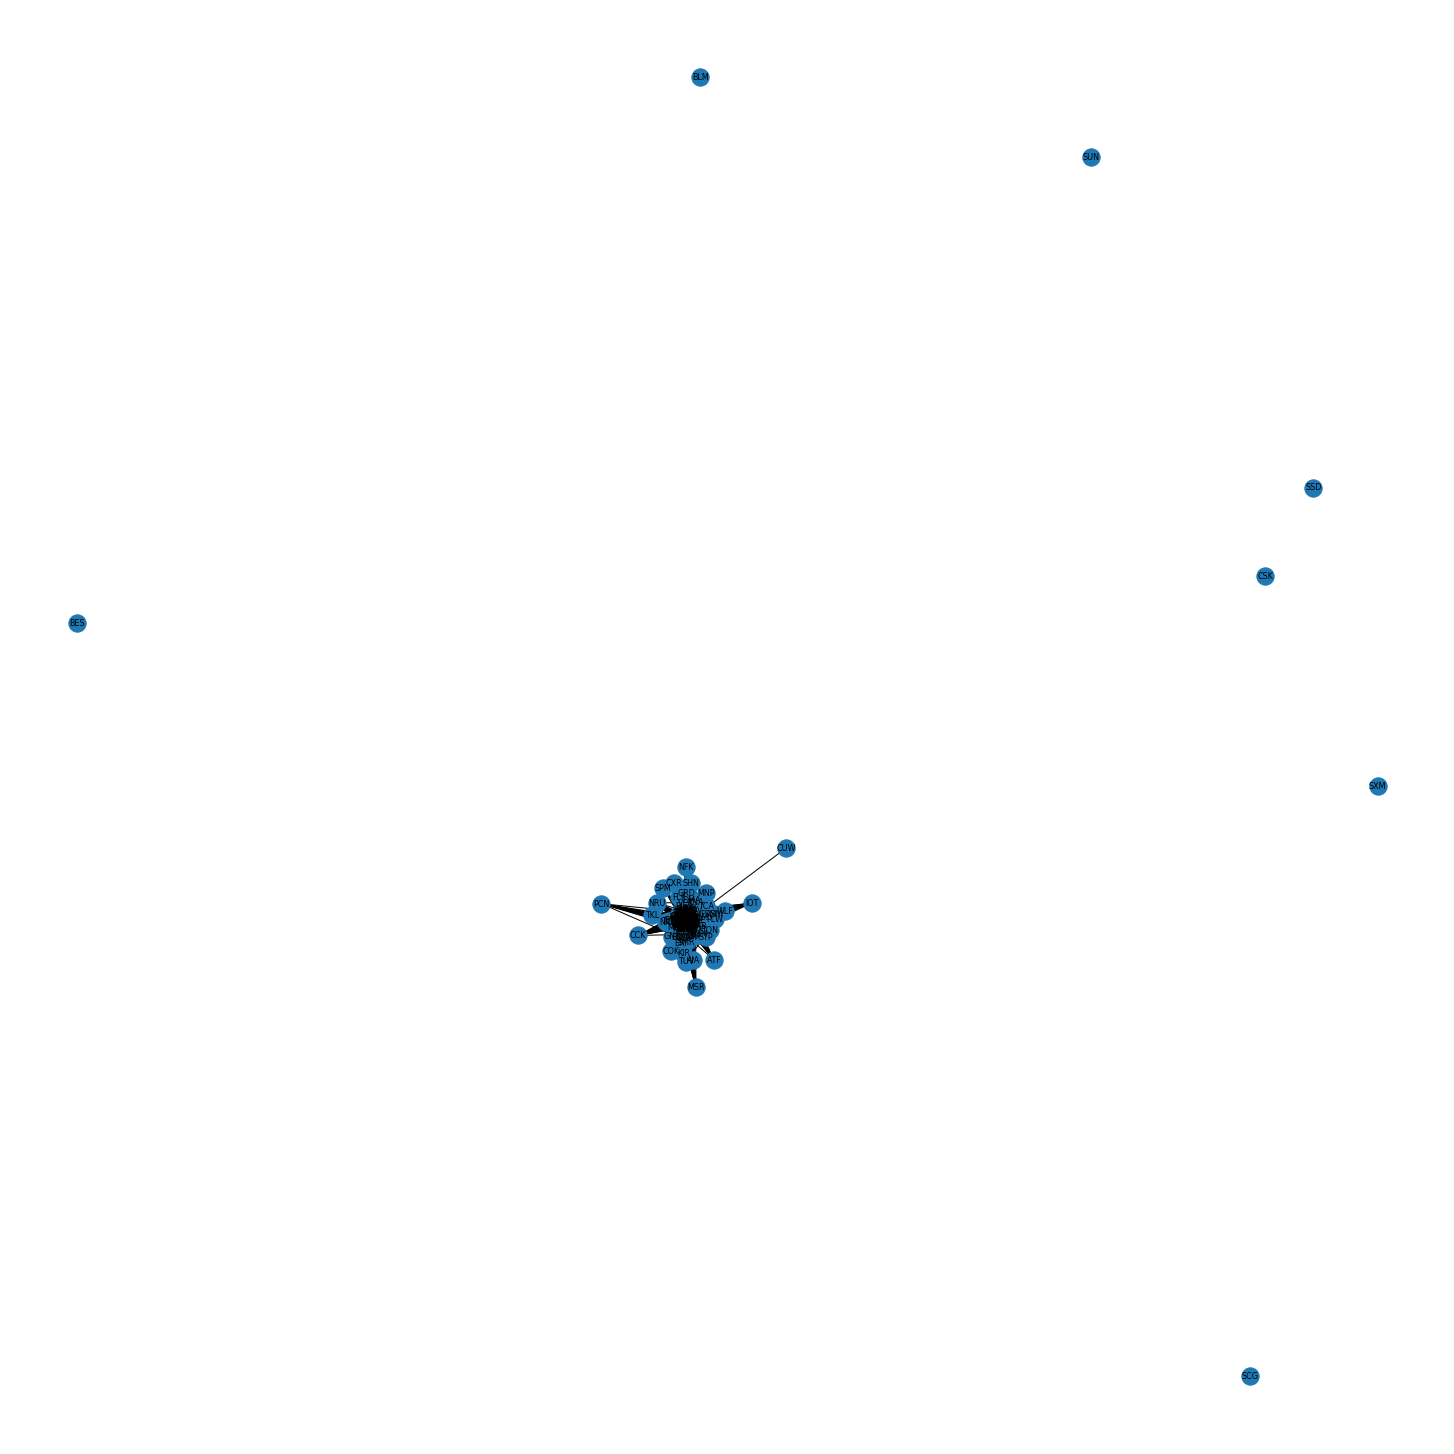

In [12]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2010_GDP=World_GDP['2010']
World_2010_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2010_GDP[i])==False:
        World_2010_dict.update({World_Country[i]:World_2010_GDP[i]})
        
BACI2010=nx.Graph()
BACI2010_NODE=countryname
if np.nan in BACI2010_NODE:
    BACI2010_NODE.remove(np.nan)

BACI2010.add_nodes_from(BACI2010_NODE)

BACI2010_IMPORT=list(baci2010['i'])
BACI2010_EXPORT=list(baci2010['j'])
BACI2010_WEIGHT=list(baci2010['v'])

BACI2010_TRADE_LIST=[]
BACI2010_TRADE_WEIGHT_DICT={}


BACI2010_TRADE_WEIGHT_DICT={}
BACI2010_TRADE_WEIGHT_DICT.update({BACI2010_IMPORT[0]:{BACI2010_EXPORT[0]:BACI2010_WEIGHT[0]}})
    
for i in range(1,len(baci2010)):
    if (BACI2010_IMPORT[i] == BACI2010_IMPORT[i-1]) & (BACI2010_EXPORT[i] == BACI2010_EXPORT[i-1]):
        BACI2010_TRADE_WEIGHT_DICT[BACI2010_IMPORT[i]].update\
        ({BACI2010_EXPORT[i]:\
          BACI2010_TRADE_WEIGHT_DICT[BACI2010_IMPORT[i]][BACI2010_EXPORT[i]]+BACI2010_WEIGHT[i]})
    elif BACI2010_IMPORT[i] == BACI2010_IMPORT[i-1]: 
        BACI2010_TRADE_WEIGHT_DICT[BACI2010_IMPORT[i]].update({BACI2010_EXPORT[i]:BACI2010_WEIGHT[i]})
    else:
        BACI2010_TRADE_WEIGHT_DICT.update({BACI2010_IMPORT[i]:{BACI2010_EXPORT[i]:BACI2010_WEIGHT[i]}})

BACI2010_TRADING_PAIR=[]
for exporting_nation in BACI2010_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2010_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2010_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2010_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2010_TRADING_UD_PAIR={}
for i in range(len(BACI2010_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2010_TRADING_PAIR)):
        if (BACI2010_TRADING_PAIR[i][0]==BACI2010_TRADING_PAIR[j][1]) & (BACI2010_TRADING_PAIR[j][0]==BACI2010_TRADING_PAIR[i][1]):
            BACI2010_TRADING_UD_PAIR.update({(BACI2010_TRADING_PAIR[i][0],BACI2010_TRADING_PAIR[i][1]):\
                                            BACI2010_TRADING_PAIR[i][2]+BACI2010_TRADING_PAIR[j][2]})

    if ((BACI2010_TRADING_PAIR[i][0],BACI2010_TRADING_PAIR[i][1]) not in BACI2010_TRADING_UD_PAIR.keys())&\
    ((BACI2010_TRADING_PAIR[i][1],BACI2010_TRADING_PAIR[i][0]) not in BACI2010_TRADING_UD_PAIR.keys()):
            BACI2010_TRADING_UD_PAIR.update({(BACI2010_TRADING_PAIR[i][0],BACI2010_TRADING_PAIR[i][1]):\
                                            BACI2010_TRADING_PAIR[i][2]})
BACI2010_TRADING_EDGE=[]
for trade in BACI2010_TRADING_UD_PAIR:
    BACI2010_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2010_TRADING_UD_PAIR[trade]))

for trade in BACI2010_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2010_TRADING_EDGE.remove(trade)
                    
        
        
BACI2010.add_weighted_edges_from(BACI2010_TRADING_EDGE)
pos=nx.spring_layout(BACI2010,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2010,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2010=dict(nx.clustering(BACI2010,weight='weight'))

BACI2010_TRADING_COUNTRY=[]
for trading_country in BACI2010_TRADING_EDGE:
    BACI2010_TRADING_COUNTRY.append(trading_country[0])
    BACI2010_TRADING_COUNTRY.append(trading_country[1])
    
BACI2010_TRADING_COUNTRY=set(BACI2010_TRADING_COUNTRY)
BACI2010_TRADING_COUNTRY.remove(np.nan)

BACI2010_GDP={}
for trading_country in BACI2010_TRADING_COUNTRY:
    if trading_country in World_2010_dict:
     BACI2010_GDP.update({trading_country:World_2010_dict[trading_country]})




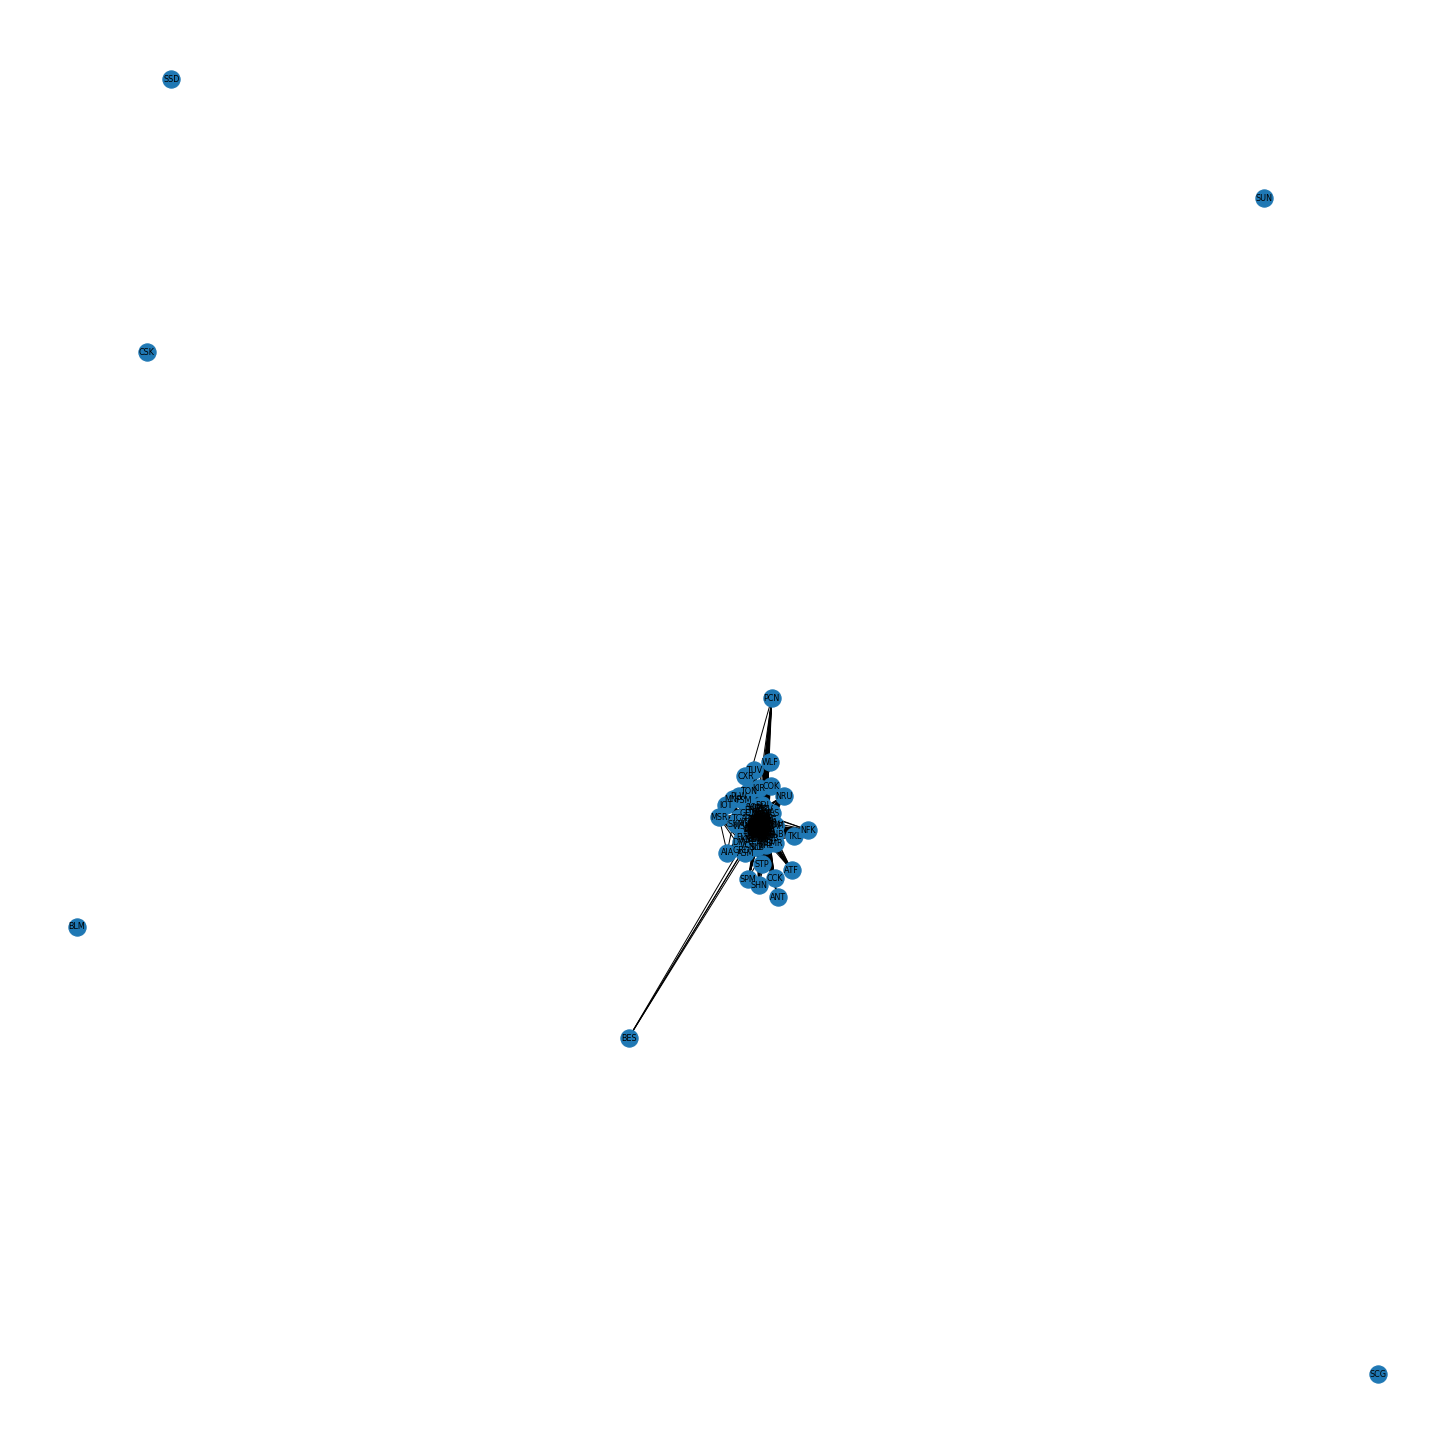

In [13]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2011_GDP=World_GDP['2011']
World_2011_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2011_GDP[i])==False:
        World_2011_dict.update({World_Country[i]:World_2011_GDP[i]})
        
BACI2011=nx.Graph()
BACI2011_NODE=countryname
if np.nan in BACI2011_NODE:
    BACI2011_NODE.remove(np.nan)

BACI2011.add_nodes_from(BACI2011_NODE)

BACI2011_IMPORT=list(baci2011['i'])
BACI2011_EXPORT=list(baci2011['j'])
BACI2011_WEIGHT=list(baci2011['v'])

BACI2011_TRADE_LIST=[]
BACI2011_TRADE_WEIGHT_DICT={}


BACI2011_TRADE_WEIGHT_DICT={}
BACI2011_TRADE_WEIGHT_DICT.update({BACI2011_IMPORT[0]:{BACI2011_EXPORT[0]:BACI2011_WEIGHT[0]}})
    
for i in range(1,len(baci2011)):
    if (BACI2011_IMPORT[i] == BACI2011_IMPORT[i-1]) & (BACI2011_EXPORT[i] == BACI2011_EXPORT[i-1]):
        BACI2011_TRADE_WEIGHT_DICT[BACI2011_IMPORT[i]].update\
        ({BACI2011_EXPORT[i]:\
          BACI2011_TRADE_WEIGHT_DICT[BACI2011_IMPORT[i]][BACI2011_EXPORT[i]]+BACI2011_WEIGHT[i]})
    elif BACI2011_IMPORT[i] == BACI2011_IMPORT[i-1]: 
        BACI2011_TRADE_WEIGHT_DICT[BACI2011_IMPORT[i]].update({BACI2011_EXPORT[i]:BACI2011_WEIGHT[i]})
    else:
        BACI2011_TRADE_WEIGHT_DICT.update({BACI2011_IMPORT[i]:{BACI2011_EXPORT[i]:BACI2011_WEIGHT[i]}})

BACI2011_TRADING_PAIR=[]
for exporting_nation in BACI2011_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2011_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2011_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2011_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2011_TRADING_UD_PAIR={}
for i in range(len(BACI2011_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2011_TRADING_PAIR)):
        if (BACI2011_TRADING_PAIR[i][0]==BACI2011_TRADING_PAIR[j][1]) & (BACI2011_TRADING_PAIR[j][0]==BACI2011_TRADING_PAIR[i][1]):
            BACI2011_TRADING_UD_PAIR.update({(BACI2011_TRADING_PAIR[i][0],BACI2011_TRADING_PAIR[i][1]):\
                                            BACI2011_TRADING_PAIR[i][2]+BACI2011_TRADING_PAIR[j][2]})

    if ((BACI2011_TRADING_PAIR[i][0],BACI2011_TRADING_PAIR[i][1]) not in BACI2011_TRADING_UD_PAIR.keys())&\
    ((BACI2011_TRADING_PAIR[i][1],BACI2011_TRADING_PAIR[i][0]) not in BACI2011_TRADING_UD_PAIR.keys()):
            BACI2011_TRADING_UD_PAIR.update({(BACI2011_TRADING_PAIR[i][0],BACI2011_TRADING_PAIR[i][1]):\
                                            BACI2011_TRADING_PAIR[i][2]})
BACI2011_TRADING_EDGE=[]
for trade in BACI2011_TRADING_UD_PAIR:
    BACI2011_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2011_TRADING_UD_PAIR[trade]))

for trade in BACI2011_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2011_TRADING_EDGE.remove(trade)
                    
        
        
BACI2011.add_weighted_edges_from(BACI2011_TRADING_EDGE)
pos=nx.spring_layout(BACI2011,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2011,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2011=dict(nx.clustering(BACI2011,weight='weight'))

BACI2011_TRADING_COUNTRY=[]
for trading_country in BACI2011_TRADING_EDGE:
    BACI2011_TRADING_COUNTRY.append(trading_country[0])
    BACI2011_TRADING_COUNTRY.append(trading_country[1])
    
BACI2011_TRADING_COUNTRY=set(BACI2011_TRADING_COUNTRY)
BACI2011_TRADING_COUNTRY.remove(np.nan)

BACI2011_GDP={}
for trading_country in BACI2011_TRADING_COUNTRY:
    if trading_country in World_2011_dict:
     BACI2011_GDP.update({trading_country:World_2011_dict[trading_country]})




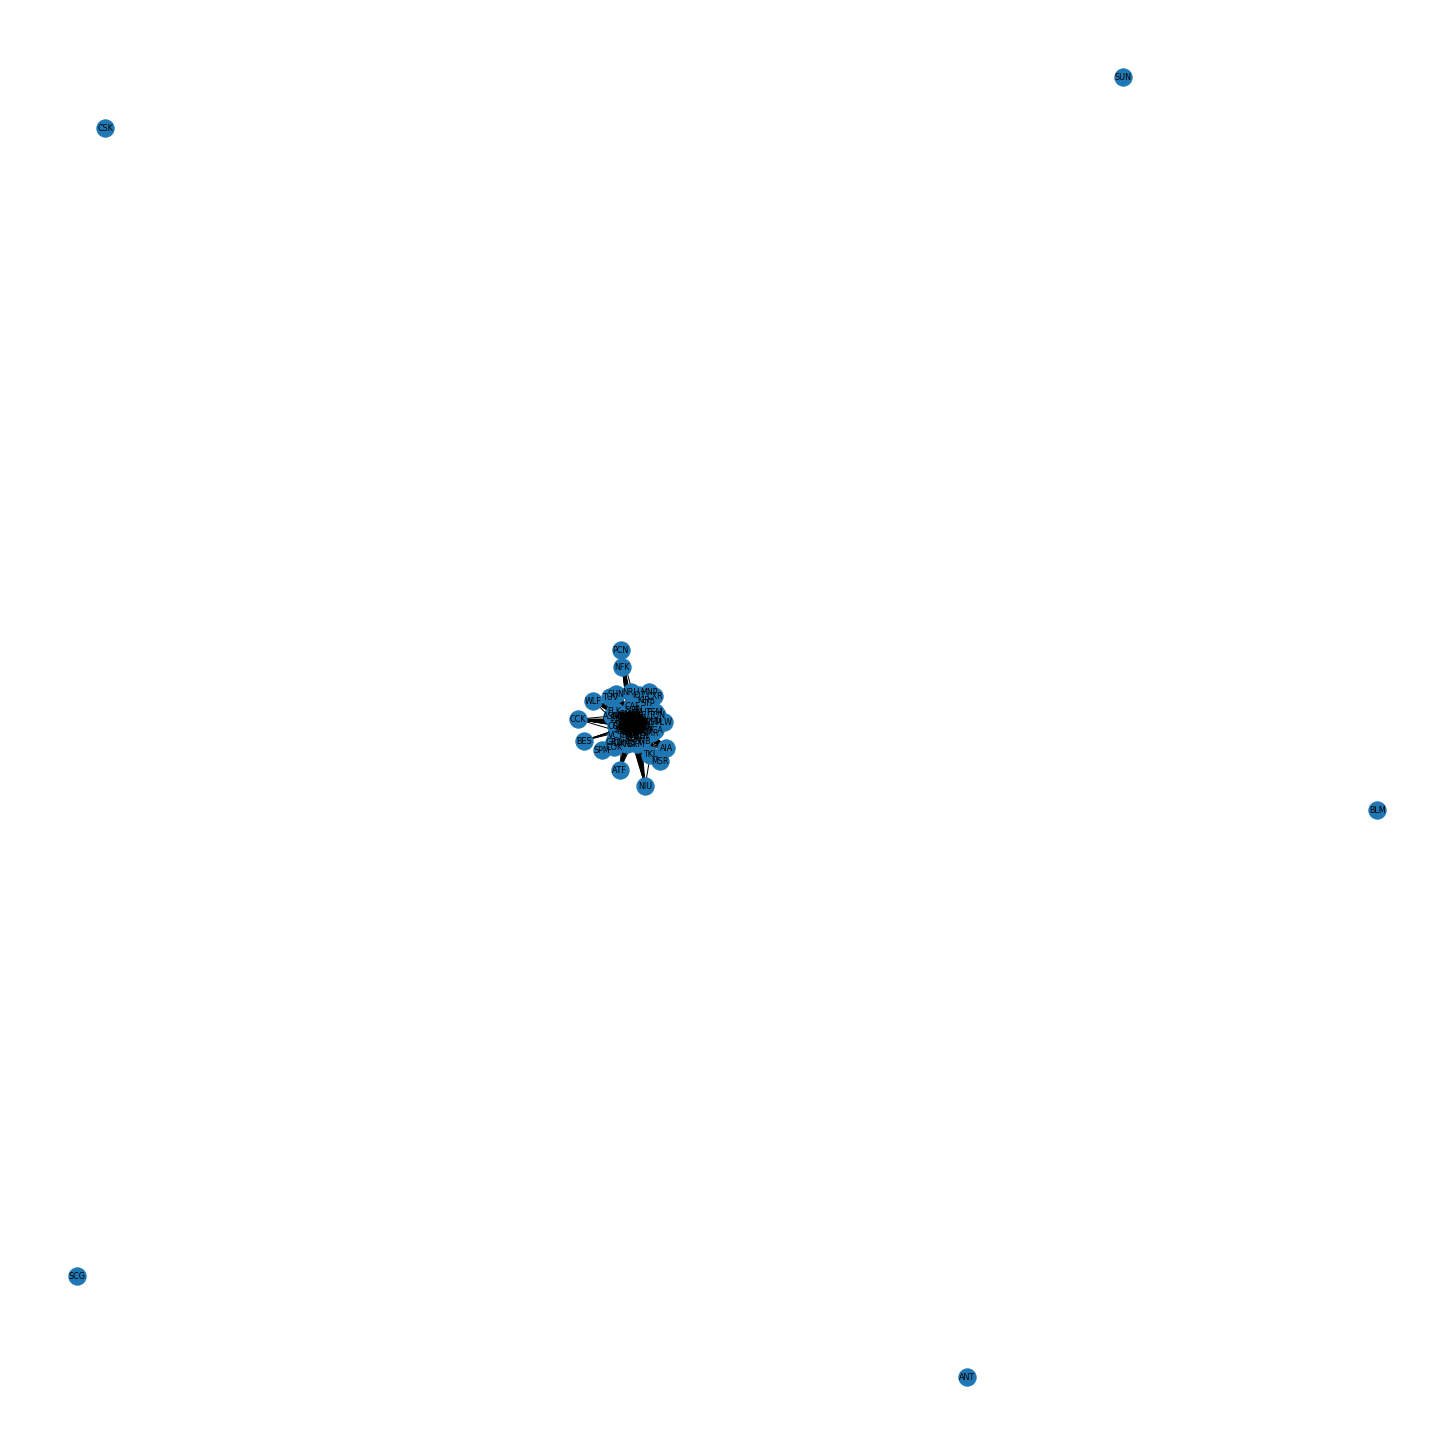

In [14]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2012_GDP=World_GDP['2012']
World_2012_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2012_GDP[i])==False:
        World_2012_dict.update({World_Country[i]:World_2012_GDP[i]})
        
BACI2012=nx.Graph()
BACI2012_NODE=countryname
if np.nan in BACI2012_NODE:
    BACI2012_NODE.remove(np.nan)

BACI2012.add_nodes_from(BACI2012_NODE)

BACI2012_IMPORT=list(baci2012['i'])
BACI2012_EXPORT=list(baci2012['j'])
BACI2012_WEIGHT=list(baci2012['v'])

BACI2012_TRADE_LIST=[]
BACI2012_TRADE_WEIGHT_DICT={}


BACI2012_TRADE_WEIGHT_DICT={}
BACI2012_TRADE_WEIGHT_DICT.update({BACI2012_IMPORT[0]:{BACI2012_EXPORT[0]:BACI2012_WEIGHT[0]}})
    
for i in range(1,len(baci2012)):
    if (BACI2012_IMPORT[i] == BACI2012_IMPORT[i-1]) & (BACI2012_EXPORT[i] == BACI2012_EXPORT[i-1]):
        BACI2012_TRADE_WEIGHT_DICT[BACI2012_IMPORT[i]].update\
        ({BACI2012_EXPORT[i]:\
          BACI2012_TRADE_WEIGHT_DICT[BACI2012_IMPORT[i]][BACI2012_EXPORT[i]]+BACI2012_WEIGHT[i]})
    elif BACI2012_IMPORT[i] == BACI2012_IMPORT[i-1]: 
        BACI2012_TRADE_WEIGHT_DICT[BACI2012_IMPORT[i]].update({BACI2012_EXPORT[i]:BACI2012_WEIGHT[i]})
    else:
        BACI2012_TRADE_WEIGHT_DICT.update({BACI2012_IMPORT[i]:{BACI2012_EXPORT[i]:BACI2012_WEIGHT[i]}})

BACI2012_TRADING_PAIR=[]
for exporting_nation in BACI2012_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2012_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2012_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2012_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2012_TRADING_UD_PAIR={}
for i in range(len(BACI2012_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2012_TRADING_PAIR)):
        if (BACI2012_TRADING_PAIR[i][0]==BACI2012_TRADING_PAIR[j][1]) & (BACI2012_TRADING_PAIR[j][0]==BACI2012_TRADING_PAIR[i][1]):
            BACI2012_TRADING_UD_PAIR.update({(BACI2012_TRADING_PAIR[i][0],BACI2012_TRADING_PAIR[i][1]):\
                                            BACI2012_TRADING_PAIR[i][2]+BACI2012_TRADING_PAIR[j][2]})

    if ((BACI2012_TRADING_PAIR[i][0],BACI2012_TRADING_PAIR[i][1]) not in BACI2012_TRADING_UD_PAIR.keys())&\
    ((BACI2012_TRADING_PAIR[i][1],BACI2012_TRADING_PAIR[i][0]) not in BACI2012_TRADING_UD_PAIR.keys()):
            BACI2012_TRADING_UD_PAIR.update({(BACI2012_TRADING_PAIR[i][0],BACI2012_TRADING_PAIR[i][1]):\
                                            BACI2012_TRADING_PAIR[i][2]})
BACI2012_TRADING_EDGE=[]
for trade in BACI2012_TRADING_UD_PAIR:
    BACI2012_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2012_TRADING_UD_PAIR[trade]))

for trade in BACI2012_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2012_TRADING_EDGE.remove(trade)
                    
        
        
BACI2012.add_weighted_edges_from(BACI2012_TRADING_EDGE)
pos=nx.spring_layout(BACI2012,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2012,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2012=dict(nx.clustering(BACI2012,weight='weight'))

BACI2012_TRADING_COUNTRY=[]
for trading_country in BACI2012_TRADING_EDGE:
    BACI2012_TRADING_COUNTRY.append(trading_country[0])
    BACI2012_TRADING_COUNTRY.append(trading_country[1])
    
BACI2012_TRADING_COUNTRY=set(BACI2012_TRADING_COUNTRY)
BACI2012_TRADING_COUNTRY.remove(np.nan)

BACI2012_GDP={}
for trading_country in BACI2012_TRADING_COUNTRY:
    if trading_country in World_2012_dict:
     BACI2012_GDP.update({trading_country:World_2012_dict[trading_country]})




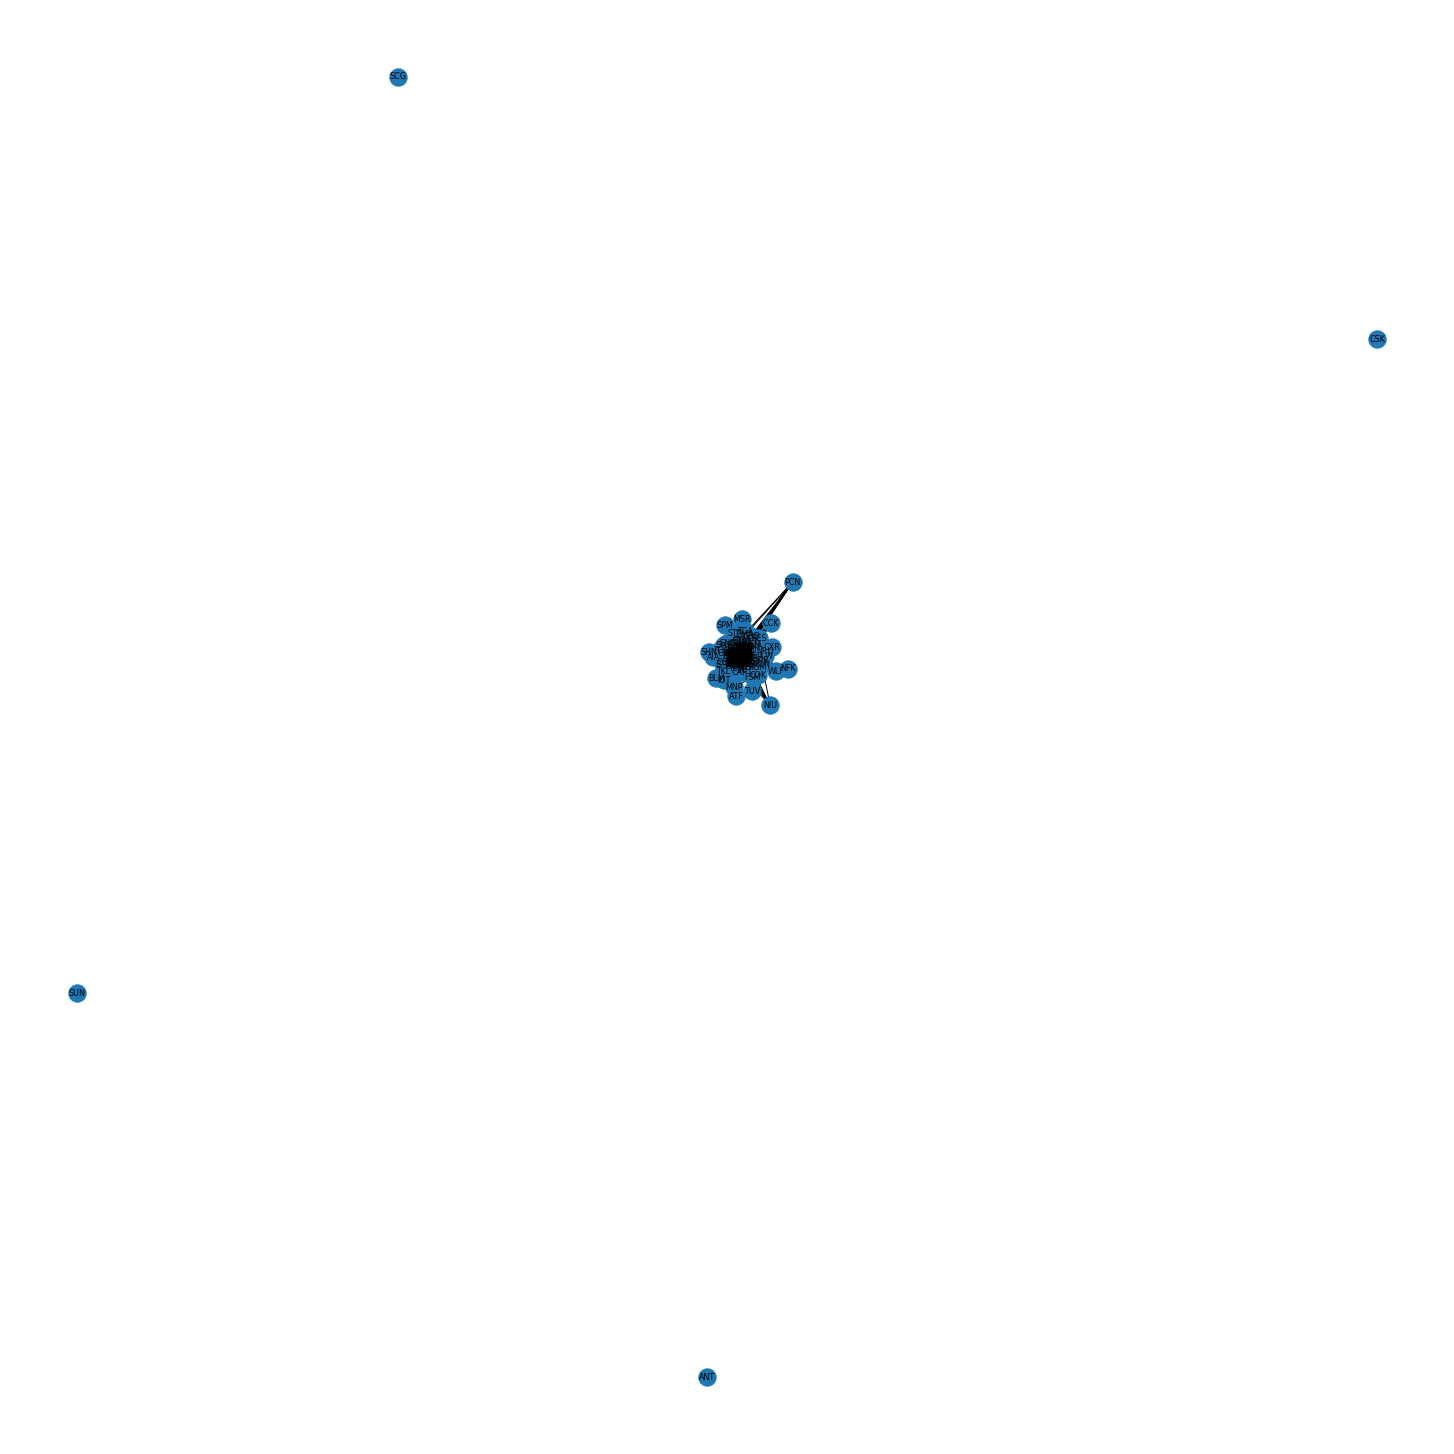

In [15]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2013_GDP=World_GDP['2013']
World_2013_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2013_GDP[i])==False:
        World_2013_dict.update({World_Country[i]:World_2013_GDP[i]})
        
BACI2013=nx.Graph()
BACI2013_NODE=countryname
if np.nan in BACI2013_NODE:
    BACI2013_NODE.remove(np.nan)

BACI2013.add_nodes_from(BACI2013_NODE)

BACI2013_IMPORT=list(baci2013['i'])
BACI2013_EXPORT=list(baci2013['j'])
BACI2013_WEIGHT=list(baci2013['v'])

BACI2013_TRADE_LIST=[]
BACI2013_TRADE_WEIGHT_DICT={}


BACI2013_TRADE_WEIGHT_DICT={}
BACI2013_TRADE_WEIGHT_DICT.update({BACI2013_IMPORT[0]:{BACI2013_EXPORT[0]:BACI2013_WEIGHT[0]}})
    
for i in range(1,len(baci2013)):
    if (BACI2013_IMPORT[i] == BACI2013_IMPORT[i-1]) & (BACI2013_EXPORT[i] == BACI2013_EXPORT[i-1]):
        BACI2013_TRADE_WEIGHT_DICT[BACI2013_IMPORT[i]].update\
        ({BACI2013_EXPORT[i]:\
          BACI2013_TRADE_WEIGHT_DICT[BACI2013_IMPORT[i]][BACI2013_EXPORT[i]]+BACI2013_WEIGHT[i]})
    elif BACI2013_IMPORT[i] == BACI2013_IMPORT[i-1]: 
        BACI2013_TRADE_WEIGHT_DICT[BACI2013_IMPORT[i]].update({BACI2013_EXPORT[i]:BACI2013_WEIGHT[i]})
    else:
        BACI2013_TRADE_WEIGHT_DICT.update({BACI2013_IMPORT[i]:{BACI2013_EXPORT[i]:BACI2013_WEIGHT[i]}})

BACI2013_TRADING_PAIR=[]
for exporting_nation in BACI2013_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2013_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2013_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2013_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2013_TRADING_UD_PAIR={}
for i in range(len(BACI2013_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2013_TRADING_PAIR)):
        if (BACI2013_TRADING_PAIR[i][0]==BACI2013_TRADING_PAIR[j][1]) & (BACI2013_TRADING_PAIR[j][0]==BACI2013_TRADING_PAIR[i][1]):
            BACI2013_TRADING_UD_PAIR.update({(BACI2013_TRADING_PAIR[i][0],BACI2013_TRADING_PAIR[i][1]):\
                                            BACI2013_TRADING_PAIR[i][2]+BACI2013_TRADING_PAIR[j][2]})

    if ((BACI2013_TRADING_PAIR[i][0],BACI2013_TRADING_PAIR[i][1]) not in BACI2013_TRADING_UD_PAIR.keys())&\
    ((BACI2013_TRADING_PAIR[i][1],BACI2013_TRADING_PAIR[i][0]) not in BACI2013_TRADING_UD_PAIR.keys()):
            BACI2013_TRADING_UD_PAIR.update({(BACI2013_TRADING_PAIR[i][0],BACI2013_TRADING_PAIR[i][1]):\
                                            BACI2013_TRADING_PAIR[i][2]})
BACI2013_TRADING_EDGE=[]
for trade in BACI2013_TRADING_UD_PAIR:
    BACI2013_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2013_TRADING_UD_PAIR[trade]))

for trade in BACI2013_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2013_TRADING_EDGE.remove(trade)
                    
        
        
BACI2013.add_weighted_edges_from(BACI2013_TRADING_EDGE)
pos=nx.spring_layout(BACI2013,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2013,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2013=dict(nx.clustering(BACI2013,weight='weight'))

BACI2013_TRADING_COUNTRY=[]
for trading_country in BACI2013_TRADING_EDGE:
    BACI2013_TRADING_COUNTRY.append(trading_country[0])
    BACI2013_TRADING_COUNTRY.append(trading_country[1])
    
BACI2013_TRADING_COUNTRY=set(BACI2013_TRADING_COUNTRY)
BACI2013_TRADING_COUNTRY.remove(np.nan)

BACI2013_GDP={}
for trading_country in BACI2013_TRADING_COUNTRY:
    if trading_country in World_2013_dict:
     BACI2013_GDP.update({trading_country:World_2013_dict[trading_country]})




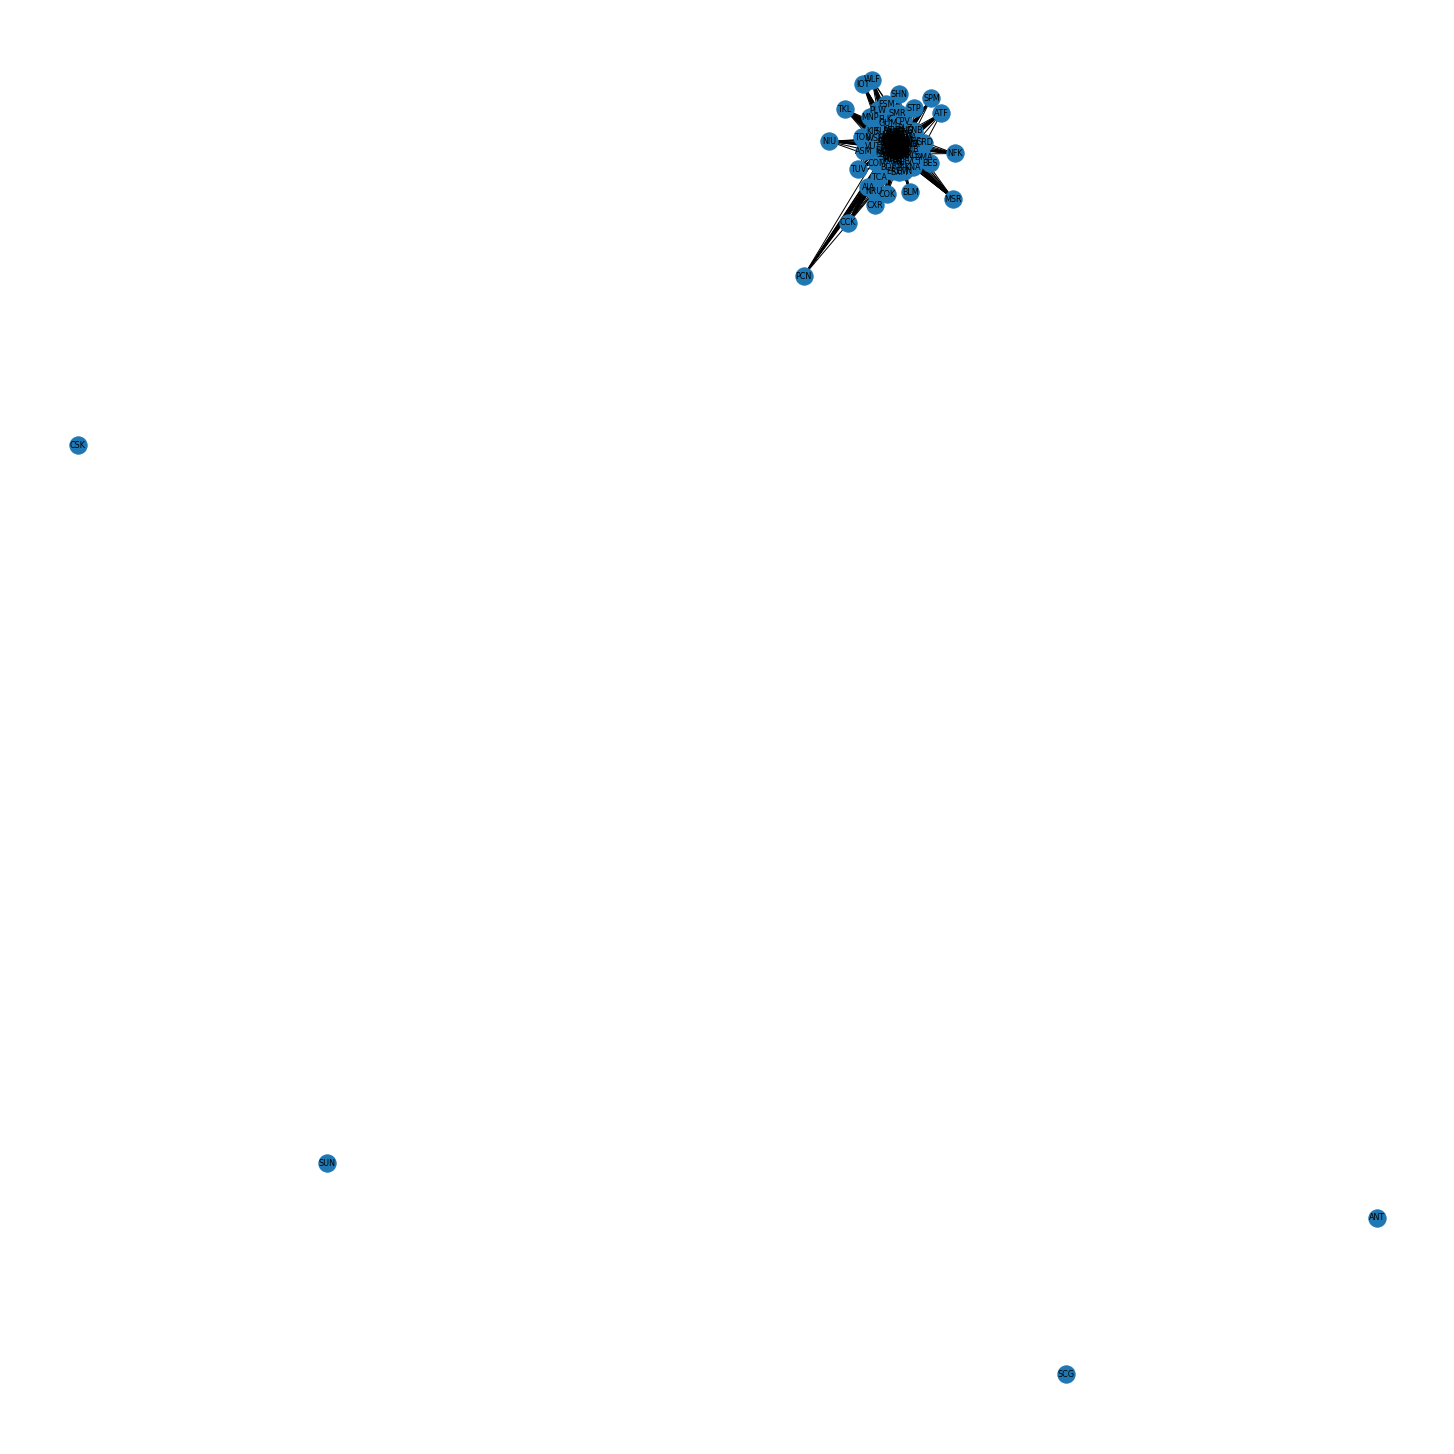

In [16]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2015_GDP=World_GDP['2015']
World_2015_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2015_GDP[i])==False:
        World_2015_dict.update({World_Country[i]:World_2015_GDP[i]})
        
BACI2015=nx.Graph()
BACI2015_NODE=countryname
if np.nan in BACI2015_NODE:
    BACI2015_NODE.remove(np.nan)

BACI2015.add_nodes_from(BACI2015_NODE)

BACI2015_IMPORT=list(baci2015['i'])
BACI2015_EXPORT=list(baci2015['j'])
BACI2015_WEIGHT=list(baci2015['v'])

BACI2015_TRADE_LIST=[]
BACI2015_TRADE_WEIGHT_DICT={}


BACI2015_TRADE_WEIGHT_DICT={}
BACI2015_TRADE_WEIGHT_DICT.update({BACI2015_IMPORT[0]:{BACI2015_EXPORT[0]:BACI2015_WEIGHT[0]}})
    
for i in range(1,len(baci2015)):
    if (BACI2015_IMPORT[i] == BACI2015_IMPORT[i-1]) & (BACI2015_EXPORT[i] == BACI2015_EXPORT[i-1]):
        BACI2015_TRADE_WEIGHT_DICT[BACI2015_IMPORT[i]].update\
        ({BACI2015_EXPORT[i]:\
          BACI2015_TRADE_WEIGHT_DICT[BACI2015_IMPORT[i]][BACI2015_EXPORT[i]]+BACI2015_WEIGHT[i]})
    elif BACI2015_IMPORT[i] == BACI2015_IMPORT[i-1]: 
        BACI2015_TRADE_WEIGHT_DICT[BACI2015_IMPORT[i]].update({BACI2015_EXPORT[i]:BACI2015_WEIGHT[i]})
    else:
        BACI2015_TRADE_WEIGHT_DICT.update({BACI2015_IMPORT[i]:{BACI2015_EXPORT[i]:BACI2015_WEIGHT[i]}})

BACI2015_TRADING_PAIR=[]
for exporting_nation in BACI2015_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2015_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2015_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2015_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2015_TRADING_UD_PAIR={}
for i in range(len(BACI2015_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2015_TRADING_PAIR)):
        if (BACI2015_TRADING_PAIR[i][0]==BACI2015_TRADING_PAIR[j][1]) & (BACI2015_TRADING_PAIR[j][0]==BACI2015_TRADING_PAIR[i][1]):
            BACI2015_TRADING_UD_PAIR.update({(BACI2015_TRADING_PAIR[i][0],BACI2015_TRADING_PAIR[i][1]):\
                                            BACI2015_TRADING_PAIR[i][2]+BACI2015_TRADING_PAIR[j][2]})

    if ((BACI2015_TRADING_PAIR[i][0],BACI2015_TRADING_PAIR[i][1]) not in BACI2015_TRADING_UD_PAIR.keys())&\
    ((BACI2015_TRADING_PAIR[i][1],BACI2015_TRADING_PAIR[i][0]) not in BACI2015_TRADING_UD_PAIR.keys()):
            BACI2015_TRADING_UD_PAIR.update({(BACI2015_TRADING_PAIR[i][0],BACI2015_TRADING_PAIR[i][1]):\
                                            BACI2015_TRADING_PAIR[i][2]})
BACI2015_TRADING_EDGE=[]
for trade in BACI2015_TRADING_UD_PAIR:
    BACI2015_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2015_TRADING_UD_PAIR[trade]))

for trade in BACI2015_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2015_TRADING_EDGE.remove(trade)
                    
        
        
BACI2015.add_weighted_edges_from(BACI2015_TRADING_EDGE)
pos=nx.spring_layout(BACI2015,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2015,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2015=dict(nx.clustering(BACI2015,weight='weight'))

BACI2015_TRADING_COUNTRY=[]
for trading_country in BACI2015_TRADING_EDGE:
    BACI2015_TRADING_COUNTRY.append(trading_country[0])
    BACI2015_TRADING_COUNTRY.append(trading_country[1])
    
BACI2015_TRADING_COUNTRY=set(BACI2015_TRADING_COUNTRY)
BACI2015_TRADING_COUNTRY.remove(np.nan)

BACI2015_GDP={}
for trading_country in BACI2015_TRADING_COUNTRY:
    if trading_country in World_2015_dict:
     BACI2015_GDP.update({trading_country:World_2015_dict[trading_country]})




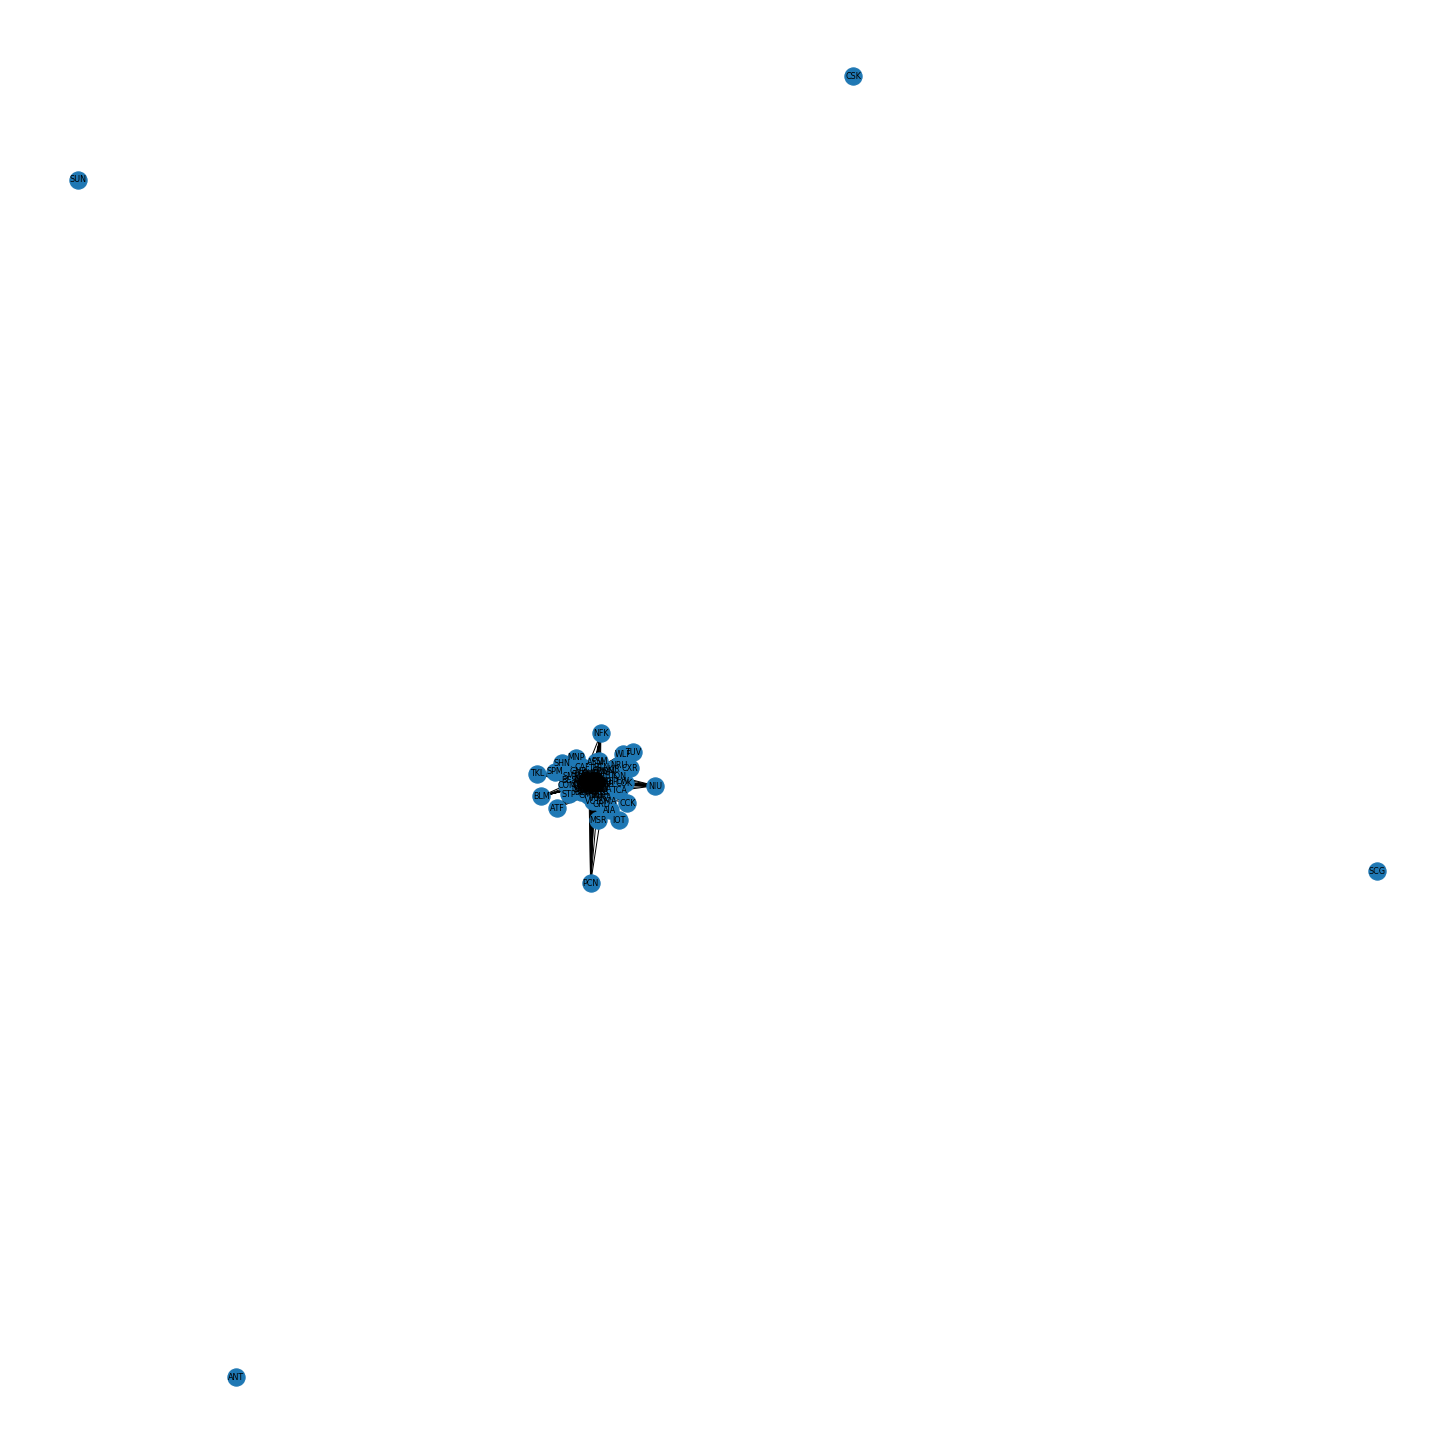

In [17]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2014_GDP=World_GDP['2014']
World_2014_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2014_GDP[i])==False:
        World_2014_dict.update({World_Country[i]:World_2014_GDP[i]})
        
BACI2014=nx.Graph()
BACI2014_NODE=countryname
if np.nan in BACI2014_NODE:
    BACI2014_NODE.remove(np.nan)

BACI2014.add_nodes_from(BACI2014_NODE)

BACI2014_IMPORT=list(baci2014['i'])
BACI2014_EXPORT=list(baci2014['j'])
BACI2014_WEIGHT=list(baci2014['v'])

BACI2014_TRADE_LIST=[]
BACI2014_TRADE_WEIGHT_DICT={}


BACI2014_TRADE_WEIGHT_DICT={}
BACI2014_TRADE_WEIGHT_DICT.update({BACI2014_IMPORT[0]:{BACI2014_EXPORT[0]:BACI2014_WEIGHT[0]}})
    
for i in range(1,len(baci2014)):
    if (BACI2014_IMPORT[i] == BACI2014_IMPORT[i-1]) & (BACI2014_EXPORT[i] == BACI2014_EXPORT[i-1]):
        BACI2014_TRADE_WEIGHT_DICT[BACI2014_IMPORT[i]].update\
        ({BACI2014_EXPORT[i]:\
          BACI2014_TRADE_WEIGHT_DICT[BACI2014_IMPORT[i]][BACI2014_EXPORT[i]]+BACI2014_WEIGHT[i]})
    elif BACI2014_IMPORT[i] == BACI2014_IMPORT[i-1]: 
        BACI2014_TRADE_WEIGHT_DICT[BACI2014_IMPORT[i]].update({BACI2014_EXPORT[i]:BACI2014_WEIGHT[i]})
    else:
        BACI2014_TRADE_WEIGHT_DICT.update({BACI2014_IMPORT[i]:{BACI2014_EXPORT[i]:BACI2014_WEIGHT[i]}})

BACI2014_TRADING_PAIR=[]
for exporting_nation in BACI2014_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2014_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2014_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2014_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2014_TRADING_UD_PAIR={}
for i in range(len(BACI2014_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2014_TRADING_PAIR)):
        if (BACI2014_TRADING_PAIR[i][0]==BACI2014_TRADING_PAIR[j][1]) & (BACI2014_TRADING_PAIR[j][0]==BACI2014_TRADING_PAIR[i][1]):
            BACI2014_TRADING_UD_PAIR.update({(BACI2014_TRADING_PAIR[i][0],BACI2014_TRADING_PAIR[i][1]):\
                                            BACI2014_TRADING_PAIR[i][2]+BACI2014_TRADING_PAIR[j][2]})

    if ((BACI2014_TRADING_PAIR[i][0],BACI2014_TRADING_PAIR[i][1]) not in BACI2014_TRADING_UD_PAIR.keys())&\
    ((BACI2014_TRADING_PAIR[i][1],BACI2014_TRADING_PAIR[i][0]) not in BACI2014_TRADING_UD_PAIR.keys()):
            BACI2014_TRADING_UD_PAIR.update({(BACI2014_TRADING_PAIR[i][0],BACI2014_TRADING_PAIR[i][1]):\
                                            BACI2014_TRADING_PAIR[i][2]})
BACI2014_TRADING_EDGE=[]
for trade in BACI2014_TRADING_UD_PAIR:
    BACI2014_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2014_TRADING_UD_PAIR[trade]))

for trade in BACI2014_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2014_TRADING_EDGE.remove(trade)
                    
        
        
BACI2014.add_weighted_edges_from(BACI2014_TRADING_EDGE)
pos=nx.spring_layout(BACI2014,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2014,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2014=dict(nx.clustering(BACI2014,weight='weight'))

BACI2014_TRADING_COUNTRY=[]
for trading_country in BACI2014_TRADING_EDGE:
    BACI2014_TRADING_COUNTRY.append(trading_country[0])
    BACI2014_TRADING_COUNTRY.append(trading_country[1])
    
BACI2014_TRADING_COUNTRY=set(BACI2014_TRADING_COUNTRY)
BACI2014_TRADING_COUNTRY.remove(np.nan)

BACI2014_GDP={}
for trading_country in BACI2014_TRADING_COUNTRY:
    if trading_country in World_2014_dict:
     BACI2014_GDP.update({trading_country:World_2014_dict[trading_country]})




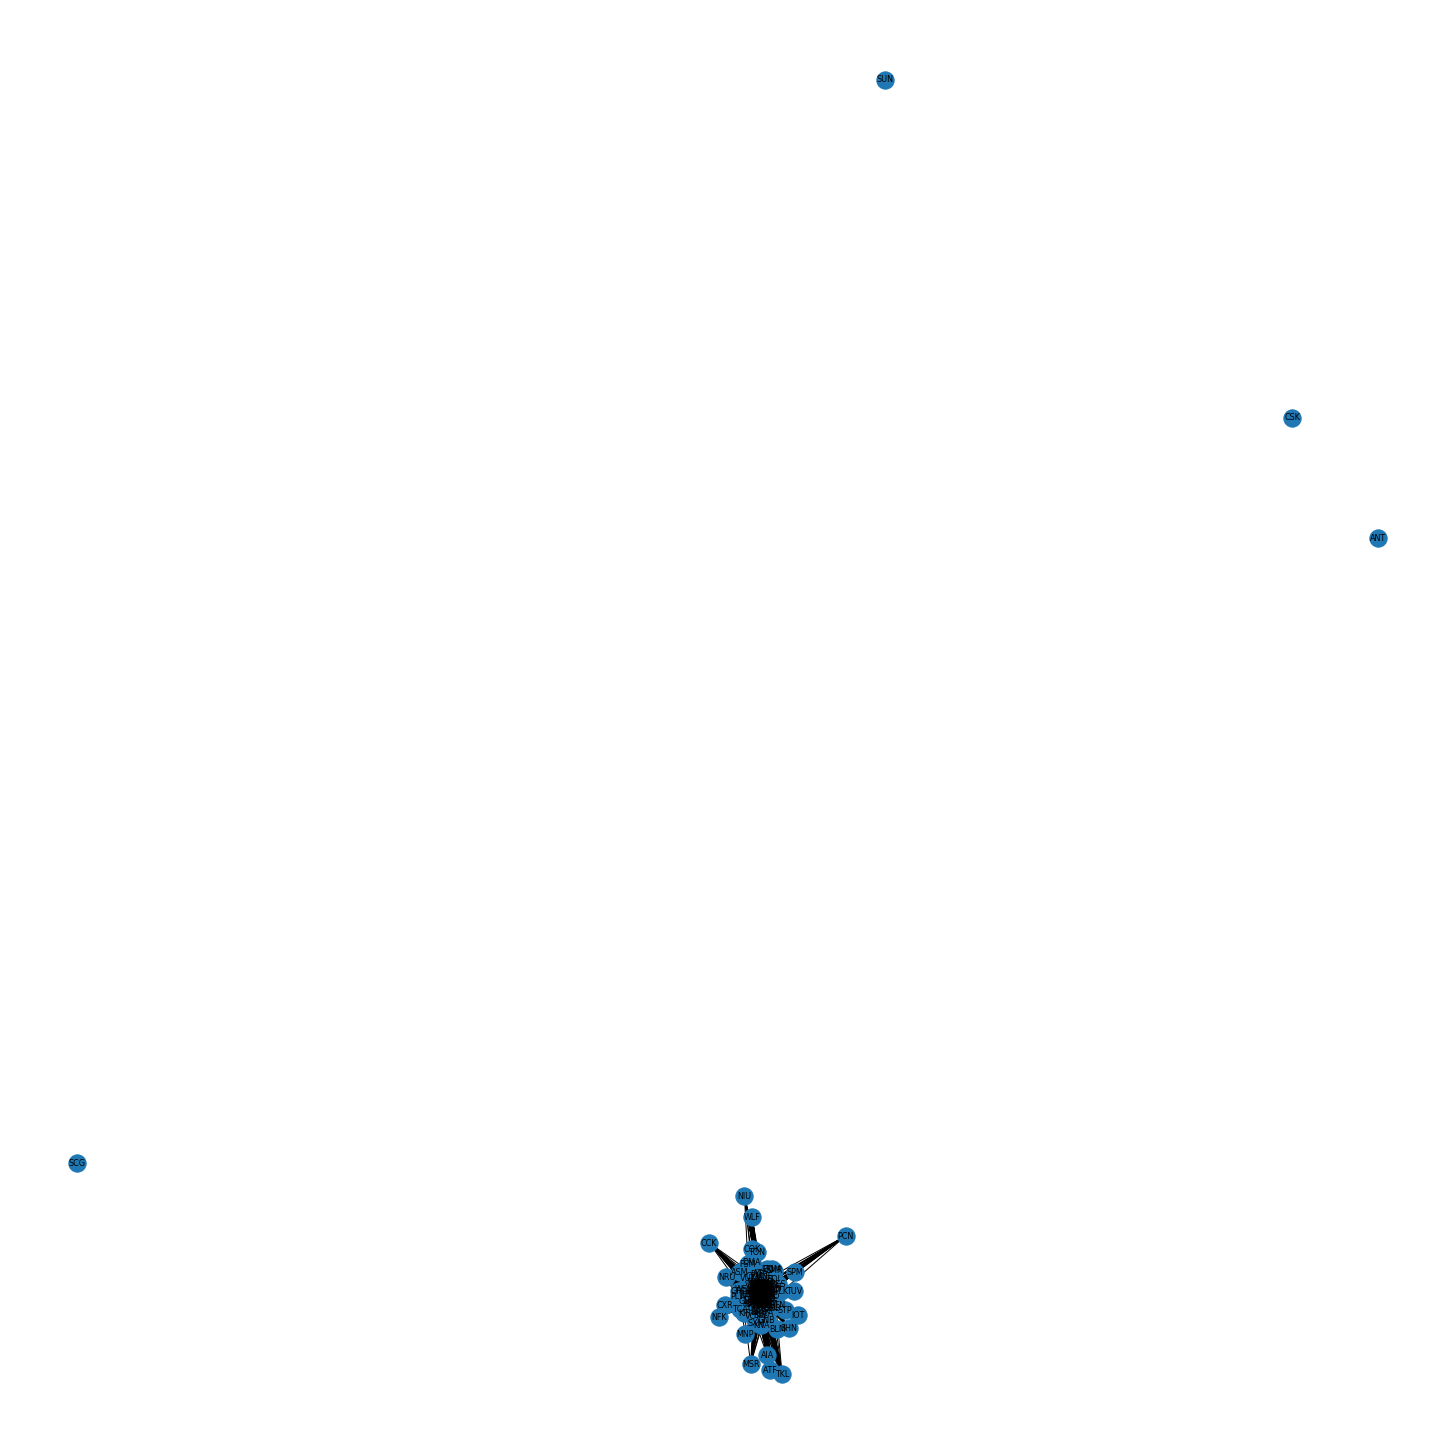

In [18]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2016_GDP=World_GDP['2016']
World_2016_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2016_GDP[i])==False:
        World_2016_dict.update({World_Country[i]:World_2016_GDP[i]})
        
BACI2016=nx.Graph()
BACI2016_NODE=countryname
if np.nan in BACI2016_NODE:
    BACI2016_NODE.remove(np.nan)

BACI2016.add_nodes_from(BACI2016_NODE)

BACI2016_IMPORT=list(baci2016['i'])
BACI2016_EXPORT=list(baci2016['j'])
BACI2016_WEIGHT=list(baci2016['v'])

BACI2016_TRADE_LIST=[]
BACI2016_TRADE_WEIGHT_DICT={}


BACI2016_TRADE_WEIGHT_DICT={}
BACI2016_TRADE_WEIGHT_DICT.update({BACI2016_IMPORT[0]:{BACI2016_EXPORT[0]:BACI2016_WEIGHT[0]}})
    
for i in range(1,len(baci2016)):
    if (BACI2016_IMPORT[i] == BACI2016_IMPORT[i-1]) & (BACI2016_EXPORT[i] == BACI2016_EXPORT[i-1]):
        BACI2016_TRADE_WEIGHT_DICT[BACI2016_IMPORT[i]].update\
        ({BACI2016_EXPORT[i]:\
          BACI2016_TRADE_WEIGHT_DICT[BACI2016_IMPORT[i]][BACI2016_EXPORT[i]]+BACI2016_WEIGHT[i]})
    elif BACI2016_IMPORT[i] == BACI2016_IMPORT[i-1]: 
        BACI2016_TRADE_WEIGHT_DICT[BACI2016_IMPORT[i]].update({BACI2016_EXPORT[i]:BACI2016_WEIGHT[i]})
    else:
        BACI2016_TRADE_WEIGHT_DICT.update({BACI2016_IMPORT[i]:{BACI2016_EXPORT[i]:BACI2016_WEIGHT[i]}})

BACI2016_TRADING_PAIR=[]
for exporting_nation in BACI2016_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2016_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2016_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2016_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2016_TRADING_UD_PAIR={}
for i in range(len(BACI2016_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2016_TRADING_PAIR)):
        if (BACI2016_TRADING_PAIR[i][0]==BACI2016_TRADING_PAIR[j][1]) & (BACI2016_TRADING_PAIR[j][0]==BACI2016_TRADING_PAIR[i][1]):
            BACI2016_TRADING_UD_PAIR.update({(BACI2016_TRADING_PAIR[i][0],BACI2016_TRADING_PAIR[i][1]):\
                                            BACI2016_TRADING_PAIR[i][2]+BACI2016_TRADING_PAIR[j][2]})

    if ((BACI2016_TRADING_PAIR[i][0],BACI2016_TRADING_PAIR[i][1]) not in BACI2016_TRADING_UD_PAIR.keys())&\
    ((BACI2016_TRADING_PAIR[i][1],BACI2016_TRADING_PAIR[i][0]) not in BACI2016_TRADING_UD_PAIR.keys()):
            BACI2016_TRADING_UD_PAIR.update({(BACI2016_TRADING_PAIR[i][0],BACI2016_TRADING_PAIR[i][1]):\
                                            BACI2016_TRADING_PAIR[i][2]})
BACI2016_TRADING_EDGE=[]
for trade in BACI2016_TRADING_UD_PAIR:
    BACI2016_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2016_TRADING_UD_PAIR[trade]))

for trade in BACI2016_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2016_TRADING_EDGE.remove(trade)
                    
        
        
BACI2016.add_weighted_edges_from(BACI2016_TRADING_EDGE)
pos=nx.spring_layout(BACI2016,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2016,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2016=dict(nx.clustering(BACI2016,weight='weight'))

BACI2016_TRADING_COUNTRY=[]
for trading_country in BACI2016_TRADING_EDGE:
    BACI2016_TRADING_COUNTRY.append(trading_country[0])
    BACI2016_TRADING_COUNTRY.append(trading_country[1])
    
BACI2016_TRADING_COUNTRY=set(BACI2016_TRADING_COUNTRY)
BACI2016_TRADING_COUNTRY.remove(np.nan)

BACI2016_GDP={}
for trading_country in BACI2016_TRADING_COUNTRY:
    if trading_country in World_2016_dict:
     BACI2016_GDP.update({trading_country:World_2016_dict[trading_country]})




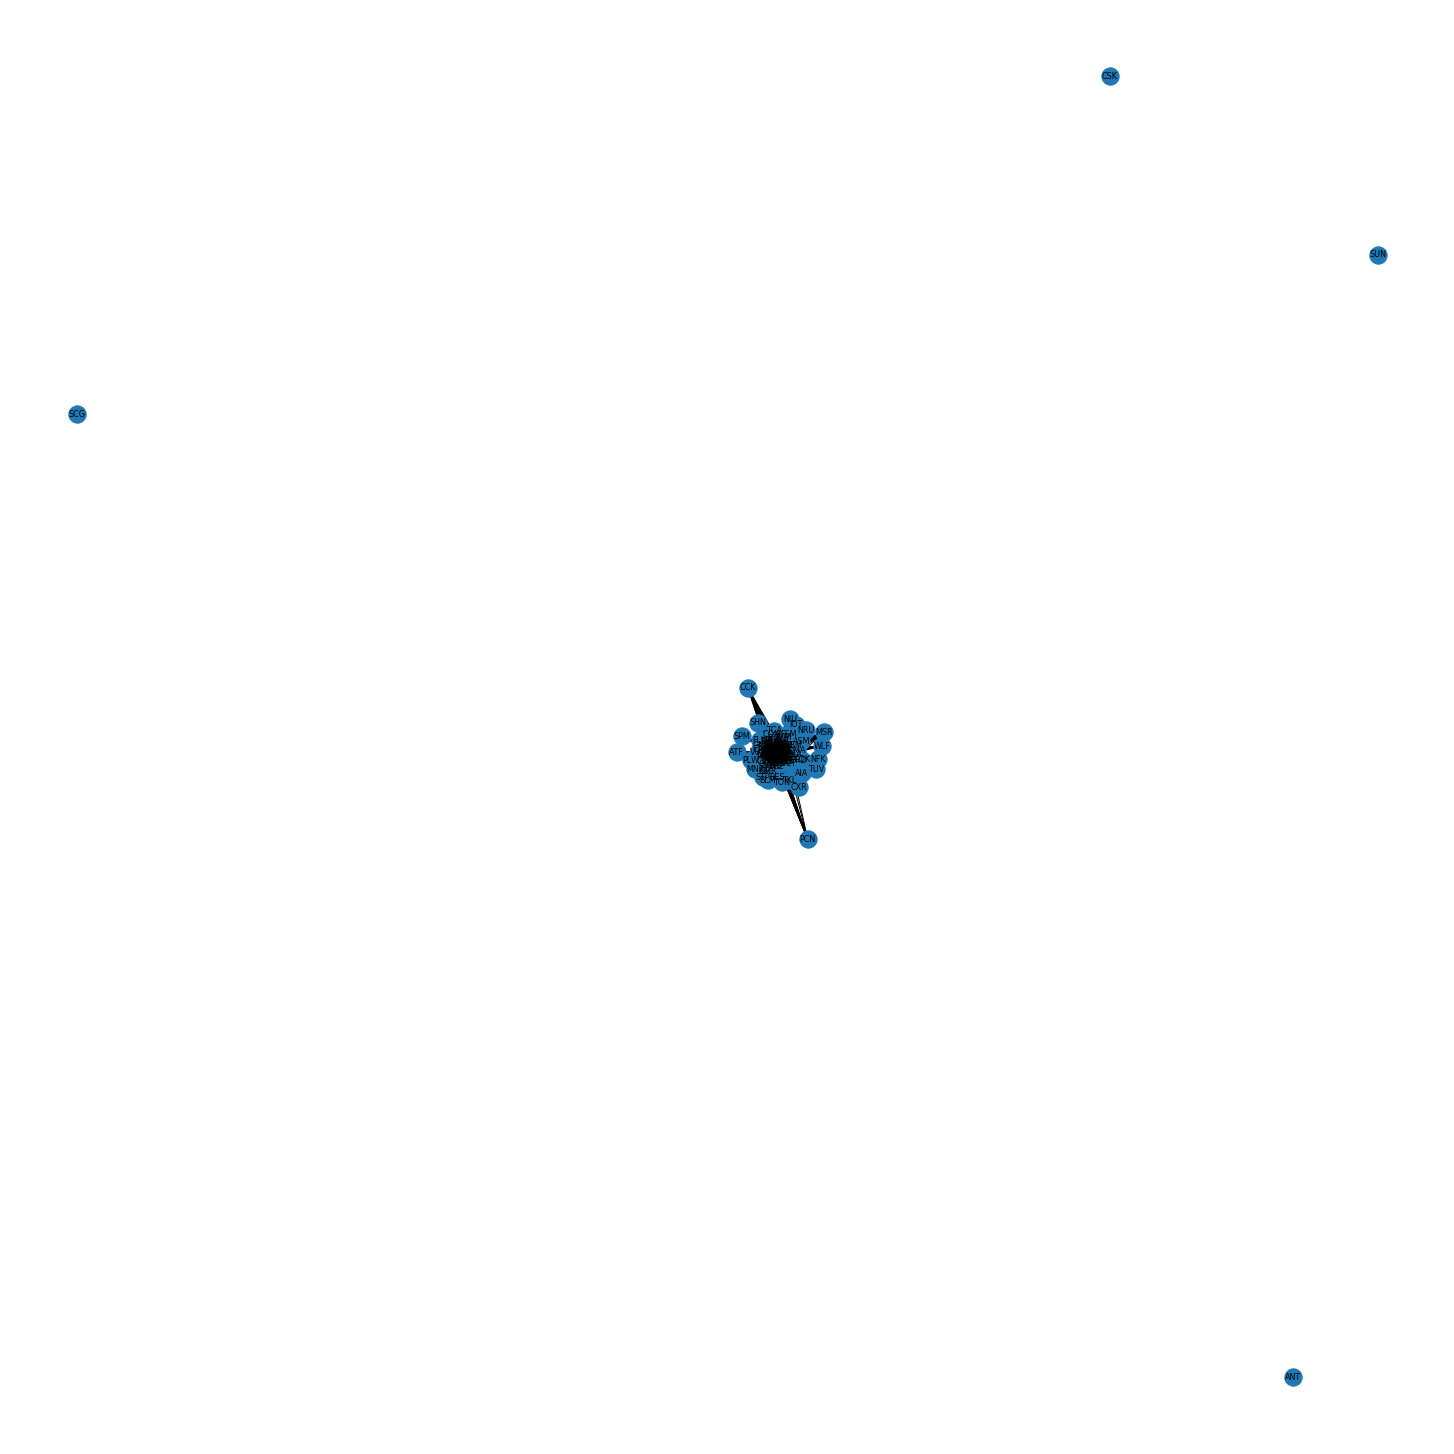

In [19]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2017_GDP=World_GDP['2017']
World_2017_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2017_GDP[i])==False:
        World_2017_dict.update({World_Country[i]:World_2017_GDP[i]})
        
BACI2017=nx.Graph()
BACI2017_NODE=countryname
if np.nan in BACI2017_NODE:
    BACI2017_NODE.remove(np.nan)

BACI2017.add_nodes_from(BACI2017_NODE)

BACI2017_IMPORT=list(baci2017['i'])
BACI2017_EXPORT=list(baci2017['j'])
BACI2017_WEIGHT=list(baci2017['v'])

BACI2017_TRADE_LIST=[]
BACI2017_TRADE_WEIGHT_DICT={}


BACI2017_TRADE_WEIGHT_DICT={}
BACI2017_TRADE_WEIGHT_DICT.update({BACI2017_IMPORT[0]:{BACI2017_EXPORT[0]:BACI2017_WEIGHT[0]}})
    
for i in range(1,len(baci2017)):
    if (BACI2017_IMPORT[i] == BACI2017_IMPORT[i-1]) & (BACI2017_EXPORT[i] == BACI2017_EXPORT[i-1]):
        BACI2017_TRADE_WEIGHT_DICT[BACI2017_IMPORT[i]].update\
        ({BACI2017_EXPORT[i]:\
          BACI2017_TRADE_WEIGHT_DICT[BACI2017_IMPORT[i]][BACI2017_EXPORT[i]]+BACI2017_WEIGHT[i]})
    elif BACI2017_IMPORT[i] == BACI2017_IMPORT[i-1]: 
        BACI2017_TRADE_WEIGHT_DICT[BACI2017_IMPORT[i]].update({BACI2017_EXPORT[i]:BACI2017_WEIGHT[i]})
    else:
        BACI2017_TRADE_WEIGHT_DICT.update({BACI2017_IMPORT[i]:{BACI2017_EXPORT[i]:BACI2017_WEIGHT[i]}})

BACI2017_TRADING_PAIR=[]
for exporting_nation in BACI2017_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2017_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2017_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2017_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2017_TRADING_UD_PAIR={}
for i in range(len(BACI2017_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2017_TRADING_PAIR)):
        if (BACI2017_TRADING_PAIR[i][0]==BACI2017_TRADING_PAIR[j][1]) & (BACI2017_TRADING_PAIR[j][0]==BACI2017_TRADING_PAIR[i][1]):
            BACI2017_TRADING_UD_PAIR.update({(BACI2017_TRADING_PAIR[i][0],BACI2017_TRADING_PAIR[i][1]):\
                                            BACI2017_TRADING_PAIR[i][2]+BACI2017_TRADING_PAIR[j][2]})

    if ((BACI2017_TRADING_PAIR[i][0],BACI2017_TRADING_PAIR[i][1]) not in BACI2017_TRADING_UD_PAIR.keys())&\
    ((BACI2017_TRADING_PAIR[i][1],BACI2017_TRADING_PAIR[i][0]) not in BACI2017_TRADING_UD_PAIR.keys()):
            BACI2017_TRADING_UD_PAIR.update({(BACI2017_TRADING_PAIR[i][0],BACI2017_TRADING_PAIR[i][1]):\
                                            BACI2017_TRADING_PAIR[i][2]})
BACI2017_TRADING_EDGE=[]
for trade in BACI2017_TRADING_UD_PAIR:
    BACI2017_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2017_TRADING_UD_PAIR[trade]))

for trade in BACI2017_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2017_TRADING_EDGE.remove(trade)
                    
        
        
BACI2017.add_weighted_edges_from(BACI2017_TRADING_EDGE)
pos=nx.spring_layout(BACI2017,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2017,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2017=dict(nx.clustering(BACI2017,weight='weight'))

BACI2017_TRADING_COUNTRY=[]
for trading_country in BACI2017_TRADING_EDGE:
    BACI2017_TRADING_COUNTRY.append(trading_country[0])
    BACI2017_TRADING_COUNTRY.append(trading_country[1])
    
BACI2017_TRADING_COUNTRY=set(BACI2017_TRADING_COUNTRY)
BACI2017_TRADING_COUNTRY.remove(np.nan)

BACI2017_GDP={}
for trading_country in BACI2017_TRADING_COUNTRY:
    if trading_country in World_2017_dict:
     BACI2017_GDP.update({trading_country:World_2017_dict[trading_country]})



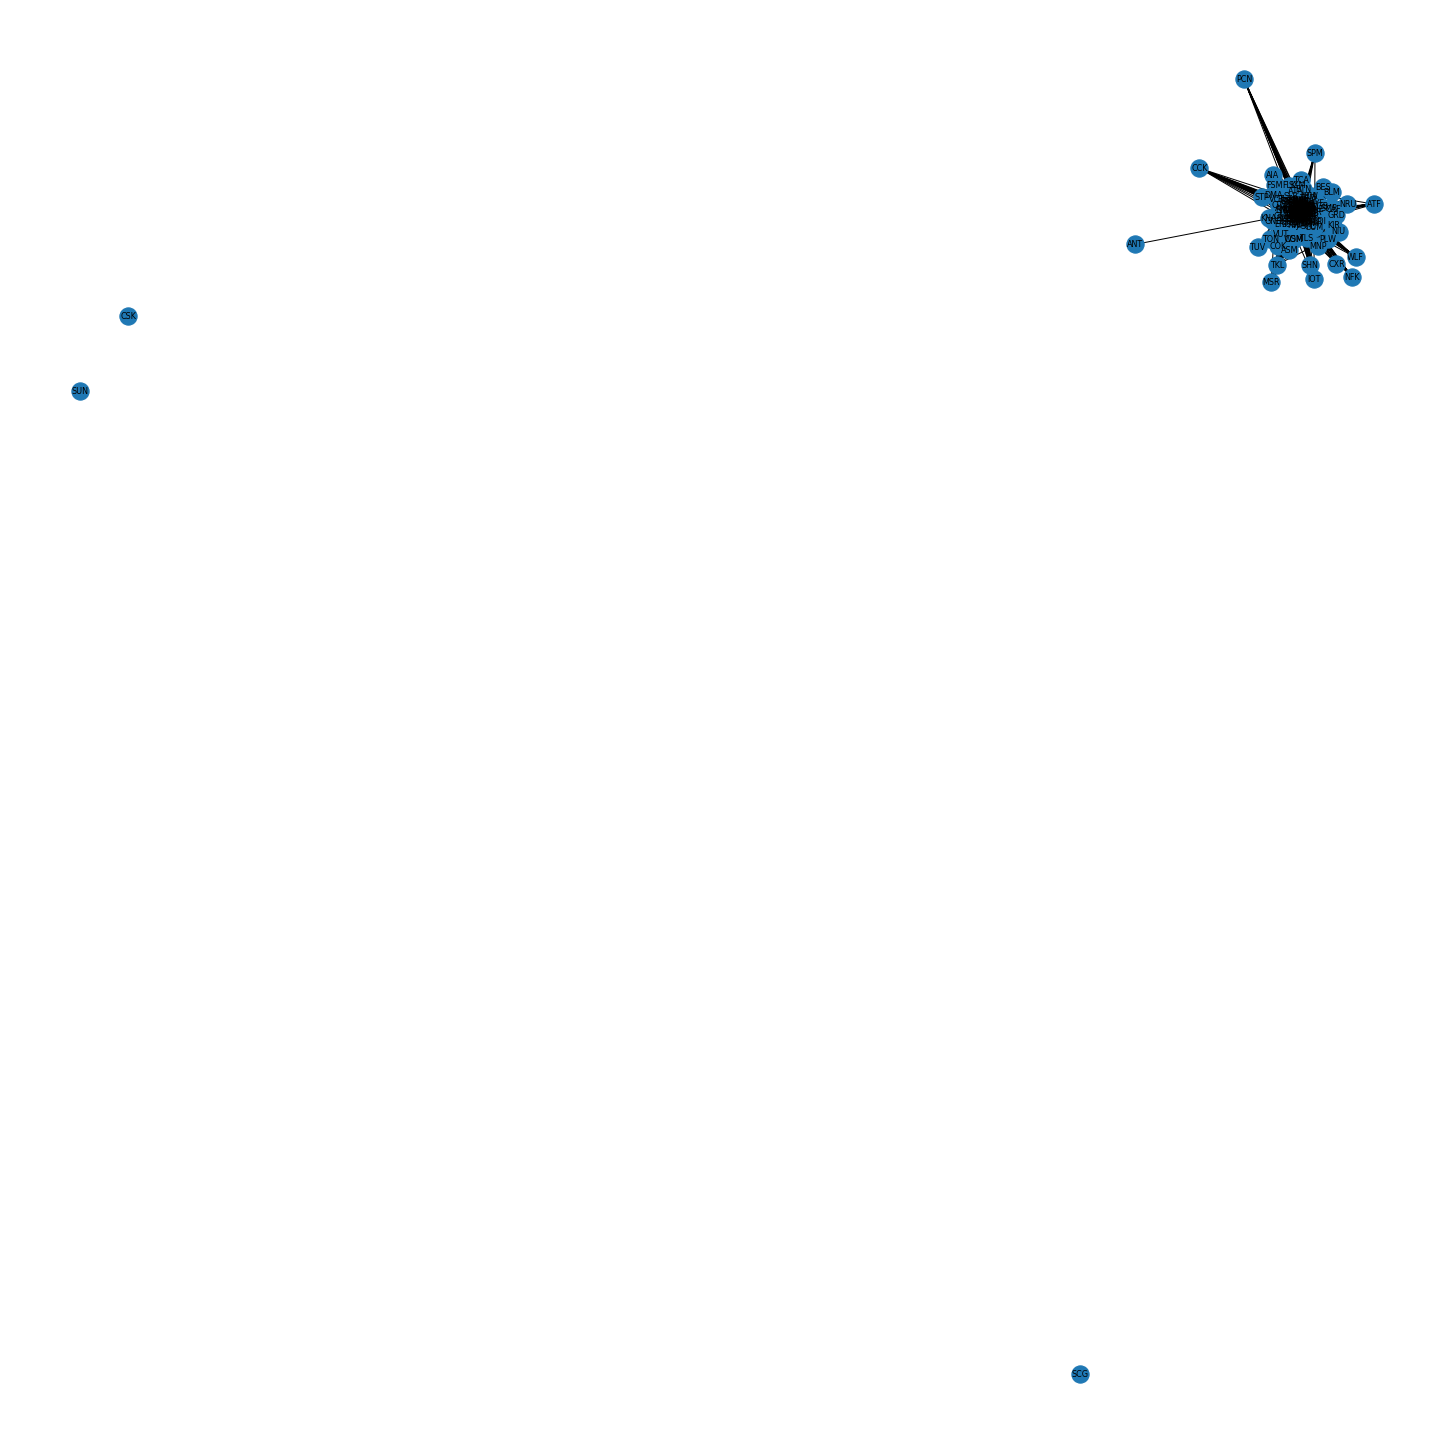

In [20]:
World_GDP=pd.read_csv('World_GDP.csv',encoding="utf8")
World_Country=World_GDP['Country Code']
World_2018_GDP=World_GDP['2018']
World_2018_dict={}
for i in range(len(World_Country)):
    if math.isnan(World_2018_GDP[i])==False:
        World_2018_dict.update({World_Country[i]:World_2018_GDP[i]})
        
BACI2018=nx.Graph()
BACI2018_NODE=countryname
if np.nan in BACI2018_NODE:
    BACI2018_NODE.remove(np.nan)

BACI2018.add_nodes_from(BACI2018_NODE)

BACI2018_IMPORT=list(baci2018['i'])
BACI2018_EXPORT=list(baci2018['j'])
BACI2018_WEIGHT=list(baci2018['v'])

BACI2018_TRADE_LIST=[]
BACI2018_TRADE_WEIGHT_DICT={}


BACI2018_TRADE_WEIGHT_DICT={}
BACI2018_TRADE_WEIGHT_DICT.update({BACI2018_IMPORT[0]:{BACI2018_EXPORT[0]:BACI2018_WEIGHT[0]}})
    
for i in range(1,len(baci2018)):
    if (BACI2018_IMPORT[i] == BACI2018_IMPORT[i-1]) & (BACI2018_EXPORT[i] == BACI2018_EXPORT[i-1]):
        BACI2018_TRADE_WEIGHT_DICT[BACI2018_IMPORT[i]].update\
        ({BACI2018_EXPORT[i]:\
          BACI2018_TRADE_WEIGHT_DICT[BACI2018_IMPORT[i]][BACI2018_EXPORT[i]]+BACI2018_WEIGHT[i]})
    elif BACI2018_IMPORT[i] == BACI2018_IMPORT[i-1]: 
        BACI2018_TRADE_WEIGHT_DICT[BACI2018_IMPORT[i]].update({BACI2018_EXPORT[i]:BACI2018_WEIGHT[i]})
    else:
        BACI2018_TRADE_WEIGHT_DICT.update({BACI2018_IMPORT[i]:{BACI2018_EXPORT[i]:BACI2018_WEIGHT[i]}})

BACI2018_TRADING_PAIR=[]
for exporting_nation in BACI2018_TRADE_WEIGHT_DICT.keys():
    for importing_nation in BACI2018_TRADE_WEIGHT_DICT[exporting_nation]:
        BACI2018_TRADING_PAIR.append((exporting_nation,importing_nation\
                                     ,BACI2018_TRADE_WEIGHT_DICT[exporting_nation][importing_nation]))
                
BACI2018_TRADING_UD_PAIR={}
for i in range(len(BACI2018_TRADING_PAIR)-1):
    for j in range(i+1,len(BACI2018_TRADING_PAIR)):
        if (BACI2018_TRADING_PAIR[i][0]==BACI2018_TRADING_PAIR[j][1]) & (BACI2018_TRADING_PAIR[j][0]==BACI2018_TRADING_PAIR[i][1]):
            BACI2018_TRADING_UD_PAIR.update({(BACI2018_TRADING_PAIR[i][0],BACI2018_TRADING_PAIR[i][1]):\
                                            BACI2018_TRADING_PAIR[i][2]+BACI2018_TRADING_PAIR[j][2]})

    if ((BACI2018_TRADING_PAIR[i][0],BACI2018_TRADING_PAIR[i][1]) not in BACI2018_TRADING_UD_PAIR.keys())&\
    ((BACI2018_TRADING_PAIR[i][1],BACI2018_TRADING_PAIR[i][0]) not in BACI2018_TRADING_UD_PAIR.keys()):
            BACI2018_TRADING_UD_PAIR.update({(BACI2018_TRADING_PAIR[i][0],BACI2018_TRADING_PAIR[i][1]):\
                                            BACI2018_TRADING_PAIR[i][2]})
BACI2018_TRADING_EDGE=[]
for trade in BACI2018_TRADING_UD_PAIR:
    BACI2018_TRADING_EDGE.append((country_dict[trade[0]],country_dict[trade[1]],BACI2018_TRADING_UD_PAIR[trade]))

for trade in BACI2018_TRADING_EDGE:
    if (type(trade[0])!=str) or (type(trade[1])!=str):
        BACI2018_TRADING_EDGE.remove(trade)
                    
        
        
BACI2018.add_weighted_edges_from(BACI2018_TRADING_EDGE)
pos=nx.spring_layout(BACI2018,k=1) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(BACI2018,pos,with_labels=True
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )

Cluster_2018=dict(nx.clustering(BACI2018,weight='weight'))

BACI2018_TRADING_COUNTRY=[]
for trading_country in BACI2018_TRADING_EDGE:
    BACI2018_TRADING_COUNTRY.append(trading_country[0])
    BACI2018_TRADING_COUNTRY.append(trading_country[1])
    
BACI2018_TRADING_COUNTRY=set(BACI2018_TRADING_COUNTRY)
BACI2018_TRADING_COUNTRY.remove(np.nan)

BACI2018_GDP={}
for trading_country in BACI2018_TRADING_COUNTRY:
    if trading_country in World_2018_dict:
     BACI2018_GDP.update({trading_country:World_2018_dict[trading_country]})




In [21]:
BACI_CLUSTER_GDP_GROWTH2003={}
TRADE_COUNTRY_IN_DICT_2003=[]
for trading_country in BACI2003_GDP:
    if (trading_country in BACI2003_GDP) and (trading_country in Cluster_2003) and (trading_country in Cluster_2002)\
    and (Cluster_2002[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2003.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2003[trading_country]-Cluster_2002[trading_country])/Cluster_2002[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2003_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2003.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2003_1=[]
DATA2003_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2003)):
    DATA2003_1.append(BACI_CLUSTER_GDP_GROWTH2003[TRADE_COUNTRY_IN_DICT_2003[i]][0])
    DATA2003_2.append(BACI_CLUSTER_GDP_GROWTH2003[TRADE_COUNTRY_IN_DICT_2003[i]][1])










In [22]:
BACI_CLUSTER_GDP_GROWTH2004={}
TRADE_COUNTRY_IN_DICT_2004=[]
for trading_country in BACI2004_GDP:
    if (trading_country in BACI2004_GDP) and (trading_country in Cluster_2004) and (trading_country in Cluster_2003)\
    and (Cluster_2003[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2004.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2004[trading_country]-Cluster_2003[trading_country])/Cluster_2003[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2004_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2004.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2004_1=[]
DATA2004_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2004)):
    DATA2004_1.append(BACI_CLUSTER_GDP_GROWTH2004[TRADE_COUNTRY_IN_DICT_2004[i]][0])
    DATA2004_2.append(BACI_CLUSTER_GDP_GROWTH2004[TRADE_COUNTRY_IN_DICT_2004[i]][1])









In [23]:
BACI_CLUSTER_GDP_GROWTH2005={}
TRADE_COUNTRY_IN_DICT_2005=[]
for trading_country in BACI2005_GDP:
    if (trading_country in BACI2005_GDP) and (trading_country in Cluster_2005) and (trading_country in Cluster_2004)\
    and (Cluster_2004[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2005.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2005[trading_country]-Cluster_2004[trading_country])/Cluster_2004[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2005_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2005.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2005_1=[]
DATA2005_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2005)):
    DATA2005_1.append(BACI_CLUSTER_GDP_GROWTH2005[TRADE_COUNTRY_IN_DICT_2005[i]][0])
    DATA2005_2.append(BACI_CLUSTER_GDP_GROWTH2005[TRADE_COUNTRY_IN_DICT_2005[i]][1])









In [24]:
BACI_CLUSTER_GDP_GROWTH2006={}
TRADE_COUNTRY_IN_DICT_2006=[]
for trading_country in BACI2006_GDP:
    if (trading_country in BACI2006_GDP) and (trading_country in Cluster_2006) and (trading_country in Cluster_2005)\
    and (Cluster_2005[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2006.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2006[trading_country]-Cluster_2005[trading_country])/Cluster_2005[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2006_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2006.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2006_1=[]
DATA2006_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2006)):
    DATA2006_1.append(BACI_CLUSTER_GDP_GROWTH2006[TRADE_COUNTRY_IN_DICT_2006[i]][0])
    DATA2006_2.append(BACI_CLUSTER_GDP_GROWTH2006[TRADE_COUNTRY_IN_DICT_2006[i]][1])








In [25]:
BACI_CLUSTER_GDP_GROWTH2007={}
TRADE_COUNTRY_IN_DICT_2007=[]
for trading_country in BACI2007_GDP:
    if (trading_country in BACI2007_GDP) and (trading_country in Cluster_2007) and (trading_country in Cluster_2006)\
    and (Cluster_2006[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2007.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2007[trading_country]-Cluster_2006[trading_country])/Cluster_2006[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2007_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2007.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2007_1=[]
DATA2007_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2007)):
    DATA2007_1.append(BACI_CLUSTER_GDP_GROWTH2007[TRADE_COUNTRY_IN_DICT_2007[i]][0])
    DATA2007_2.append(BACI_CLUSTER_GDP_GROWTH2007[TRADE_COUNTRY_IN_DICT_2007[i]][1])









In [26]:
BACI_CLUSTER_GDP_GROWTH2008={}
TRADE_COUNTRY_IN_DICT_2008=[]
for trading_country in BACI2008_GDP:
    if (trading_country in BACI2008_GDP) and (trading_country in Cluster_2008) and (trading_country in Cluster_2007)\
    and (Cluster_2007[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2008.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2008[trading_country]-Cluster_2007[trading_country])/Cluster_2007[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2008_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2008.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2008_1=[]
DATA2008_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2008)):
    DATA2008_1.append(BACI_CLUSTER_GDP_GROWTH2008[TRADE_COUNTRY_IN_DICT_2008[i]][0])
    DATA2008_2.append(BACI_CLUSTER_GDP_GROWTH2008[TRADE_COUNTRY_IN_DICT_2008[i]][1])







In [27]:
BACI_CLUSTER_GDP_GROWTH2009={}
TRADE_COUNTRY_IN_DICT_2009=[]
for trading_country in BACI2009_GDP:
    if (trading_country in BACI2009_GDP) and (trading_country in Cluster_2009) and (trading_country in Cluster_2008)\
    and (Cluster_2008[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2009.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2009[trading_country]-Cluster_2008[trading_country])/Cluster_2008[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2009_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2009.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2009_1=[]
DATA2009_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2009)):
    DATA2009_1.append(BACI_CLUSTER_GDP_GROWTH2009[TRADE_COUNTRY_IN_DICT_2009[i]][0])
    DATA2009_2.append(BACI_CLUSTER_GDP_GROWTH2009[TRADE_COUNTRY_IN_DICT_2009[i]][1])







In [28]:
BACI_CLUSTER_GDP_GROWTH2010={}
TRADE_COUNTRY_IN_DICT_2010=[]
for trading_country in BACI2010_GDP:
    if (trading_country in BACI2010_GDP) and (trading_country in Cluster_2010) and (trading_country in Cluster_2009)\
    and (Cluster_2009[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2010.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2010[trading_country]-Cluster_2009[trading_country])/Cluster_2009[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2010_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2010.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2010_1=[]
DATA2010_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2010)):
    DATA2010_1.append(BACI_CLUSTER_GDP_GROWTH2010[TRADE_COUNTRY_IN_DICT_2010[i]][0])
    DATA2010_2.append(BACI_CLUSTER_GDP_GROWTH2010[TRADE_COUNTRY_IN_DICT_2010[i]][1])








In [29]:
BACI_CLUSTER_GDP_GROWTH2011={}
TRADE_COUNTRY_IN_DICT_2011=[]
for trading_country in BACI2011_GDP:
    if (trading_country in BACI2011_GDP) and (trading_country in Cluster_2011) and (trading_country in Cluster_2010)\
    and (Cluster_2010[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2011.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2011[trading_country]-Cluster_2010[trading_country])/Cluster_2010[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2011_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2011.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2011_1=[]
DATA2011_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2011)):
    DATA2011_1.append(BACI_CLUSTER_GDP_GROWTH2011[TRADE_COUNTRY_IN_DICT_2011[i]][0])
    DATA2011_2.append(BACI_CLUSTER_GDP_GROWTH2011[TRADE_COUNTRY_IN_DICT_2011[i]][1])






In [30]:
BACI_CLUSTER_GDP_GROWTH2012={}
TRADE_COUNTRY_IN_DICT_2012=[]
for trading_country in BACI2012_GDP:
    if (trading_country in BACI2012_GDP) and (trading_country in Cluster_2012) and (trading_country in Cluster_2011)\
    and (Cluster_2011[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2012.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2012[trading_country]-Cluster_2011[trading_country])/Cluster_2011[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2012_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2012.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2012_1=[]
DATA2012_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2012)):
    DATA2012_1.append(BACI_CLUSTER_GDP_GROWTH2012[TRADE_COUNTRY_IN_DICT_2012[i]][0])
    DATA2012_2.append(BACI_CLUSTER_GDP_GROWTH2012[TRADE_COUNTRY_IN_DICT_2012[i]][1])



In [31]:
BACI_CLUSTER_GDP_GROWTH2013={}
TRADE_COUNTRY_IN_DICT_2013=[]
for trading_country in BACI2013_GDP:
    if (trading_country in BACI2013_GDP) and (trading_country in Cluster_2013) and (trading_country in Cluster_2012)\
    and (Cluster_2012[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2013.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2013[trading_country]-Cluster_2012[trading_country])/Cluster_2012[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2013_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2013.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})

sumx=0
sumy=0
sumxy=0
for i in BACI_CLUSTER_GDP_GROWTH2013:
    x=BACI_CLUSTER_GDP_GROWTH2013[i][0]
    y=BACI_CLUSTER_GDP_GROWTH2013[i][1]
    sumx+=x*x
    sumy+=y*y
    sumxy+=x*y
    
cosine_sim_2013=sumxy/np.sqrt(sumx*sumy)

DATA2013_1=[]
DATA2013_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2013)):
    DATA2013_1.append(BACI_CLUSTER_GDP_GROWTH2013[TRADE_COUNTRY_IN_DICT_2013[i]][0])
    DATA2013_2.append(BACI_CLUSTER_GDP_GROWTH2013[TRADE_COUNTRY_IN_DICT_2013[i]][1])






In [32]:
BACI_CLUSTER_GDP_GROWTH2014={}
TRADE_COUNTRY_IN_DICT_2014=[]
for trading_country in BACI2014_GDP:
    if (trading_country in BACI2014_GDP) and (trading_country in Cluster_2014) and (trading_country in Cluster_2013)\
    and (Cluster_2013[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2014.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2014[trading_country]-Cluster_2013[trading_country])/Cluster_2013[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2014_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2014.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2014_1=[]
DATA2014_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2014)):
    DATA2014_1.append(BACI_CLUSTER_GDP_GROWTH2014[TRADE_COUNTRY_IN_DICT_2014[i]][0])
    DATA2014_2.append(BACI_CLUSTER_GDP_GROWTH2014[TRADE_COUNTRY_IN_DICT_2014[i]][1])







In [33]:
BACI_CLUSTER_GDP_GROWTH2015={}
TRADE_COUNTRY_IN_DICT_2015=[]
for trading_country in BACI2015_GDP:
    if (trading_country in BACI2015_GDP) and (trading_country in Cluster_2015) and (trading_country in Cluster_2014)\
    and (Cluster_2014[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2015.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2015[trading_country]-Cluster_2014[trading_country])/Cluster_2014[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2015_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2015.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2015_1=[]
DATA2015_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2015)):
    DATA2015_1.append(BACI_CLUSTER_GDP_GROWTH2015[TRADE_COUNTRY_IN_DICT_2015[i]][0])
    DATA2015_2.append(BACI_CLUSTER_GDP_GROWTH2015[TRADE_COUNTRY_IN_DICT_2015[i]][1])








In [34]:
BACI_CLUSTER_GDP_GROWTH2016={}
TRADE_COUNTRY_IN_DICT_2016=[]
for trading_country in BACI2016_GDP:
    if (trading_country in BACI2016_GDP) and (trading_country in Cluster_2016) and (trading_country in Cluster_2015)\
    and (Cluster_2015[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2016.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2016[trading_country]-Cluster_2015[trading_country])/Cluster_2015[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2016_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2016.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2016_1=[]
DATA2016_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2016)):
    DATA2016_1.append(BACI_CLUSTER_GDP_GROWTH2016[TRADE_COUNTRY_IN_DICT_2016[i]][0])
    DATA2016_2.append(BACI_CLUSTER_GDP_GROWTH2016[TRADE_COUNTRY_IN_DICT_2016[i]][1])


In [35]:
BACI_CLUSTER_GDP_GROWTH2017={}
TRADE_COUNTRY_IN_DICT_2017=[]
for trading_country in BACI2017_GDP:
    if (trading_country in BACI2017_GDP) and (trading_country in Cluster_2017) and (trading_country in Cluster_2016)\
    and (Cluster_2016[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2017.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2017[trading_country]-Cluster_2016[trading_country])/Cluster_2016[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2017_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2017.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})



DATA2017_1=[]
DATA2017_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2017)):
    DATA2017_1.append(BACI_CLUSTER_GDP_GROWTH2017[TRADE_COUNTRY_IN_DICT_2017[i]][0])
    DATA2017_2.append(BACI_CLUSTER_GDP_GROWTH2017[TRADE_COUNTRY_IN_DICT_2017[i]][1])





In [36]:
BACI_CLUSTER_GDP_GROWTH2018={}
TRADE_COUNTRY_IN_DICT_2018=[]
for trading_country in BACI2018_GDP:
    if (trading_country in BACI2018_GDP) and (trading_country in Cluster_2018) and (trading_country in Cluster_2017)\
    and (Cluster_2017[trading_country]!=0):
        TRADE_COUNTRY_IN_DICT_2018.append(trading_country)
        CLUSTER_GROWTH=(Cluster_2018[trading_country]-Cluster_2017[trading_country])/Cluster_2017[trading_country]
        CLUSTER_GROWTH=CLUSTER_GROWTH*100;
        GDP_GROWTH=BACI2018_GDP[trading_country]
        BACI_CLUSTER_GDP_GROWTH2018.update({trading_country:(CLUSTER_GROWTH,GDP_GROWTH)})


DATA2018_1=[]
DATA2018_2=[]
for i in range(len(BACI_CLUSTER_GDP_GROWTH2018)):
    DATA2018_1.append(BACI_CLUSTER_GDP_GROWTH2018[TRADE_COUNTRY_IN_DICT_2018[i]][0])
    DATA2018_2.append(BACI_CLUSTER_GDP_GROWTH2018[TRADE_COUNTRY_IN_DICT_2018[i]][1])



In [37]:
np.corrcoef(DATA2018_1, DATA2018_2)

array([[1.        , 0.04334106],
       [0.04334106, 1.        ]])

In [38]:
np.corrcoef(DATA2017_1, DATA2017_2)

array([[1.        , 0.06984184],
       [0.06984184, 1.        ]])

In [39]:
np.corrcoef(DATA2016_1, DATA2016_2)

array([[1.        , 0.02486667],
       [0.02486667, 1.        ]])

In [40]:
np.corrcoef(DATA2015_1, DATA2015_2)

array([[1.        , 0.26279418],
       [0.26279418, 1.        ]])

In [41]:
np.corrcoef(DATA2014_1, DATA2014_2)

array([[1.        , 0.04198369],
       [0.04198369, 1.        ]])

In [42]:
np.corrcoef(DATA2013_1, DATA2013_2)

array([[1.        , 0.05141066],
       [0.05141066, 1.        ]])

In [43]:
np.corrcoef(DATA2012_1, DATA2012_2)

array([[1.        , 0.50770819],
       [0.50770819, 1.        ]])

In [44]:
np.corrcoef(DATA2011_1, DATA2011_2)

array([[1.       , 0.3474822],
       [0.3474822, 1.       ]])

In [45]:
np.corrcoef(DATA2010_1, DATA2010_2)

array([[1.        , 0.25608373],
       [0.25608373, 1.        ]])

In [46]:
np.corrcoef(DATA2009_1, DATA2009_2)

array([[1.        , 0.38048975],
       [0.38048975, 1.        ]])

In [47]:
np.corrcoef(DATA2008_1, DATA2008_2)

array([[1.        , 0.28690894],
       [0.28690894, 1.        ]])

In [48]:
np.corrcoef(DATA2007_1, DATA2007_2)

array([[1.        , 0.12284286],
       [0.12284286, 1.        ]])

In [49]:
np.corrcoef(DATA2006_1, DATA2006_2)

array([[ 1.        , -0.00647334],
       [-0.00647334,  1.        ]])

In [50]:
np.corrcoef(DATA2005_1, DATA2005_2)

array([[1.        , 0.16494824],
       [0.16494824, 1.        ]])

In [51]:
np.corrcoef(DATA2004_1, DATA2004_2)

array([[1.        , 0.25992805],
       [0.25992805, 1.        ]])

In [52]:
np.corrcoef(DATA2003_1, DATA2003_2)

array([[1.        , 0.08826297],
       [0.08826297, 1.        ]])

In [53]:
BACI_CLUSTER_GDP_GROWTH2011['CHN']

(6.009177056216738, 9.55091409001014)

In [54]:
     for key, value in sorted(dict(BACI2018.degree(weight='weight')).items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))    

CSK: 0
SUN: 0
SCG: 0
ANT: 2716.3146652491096
PCN: 3833.0060000000003
CCK: 9477.330999999998
NFK: 21706.63966681366
MSR: 25958.426
ATF: 30023.627000000004
WLF: 35514.791174401034
IOT: 36448.443999999996
CXR: 47201.78999999999
SPM: 48887.55423123652
TKL: 63500.985925154804
SHN: 69551.04407190658
TUV: 76717.58091425699
NRU: 101765.81193864769
AIA: 118028.79438033816
NIU: 149364.97920952472
COK: 155950.25885593286
MNP: 173698.4446881492
STP: 176036.21666682643
PLW: 177080.32939672846
TON: 190027.04705676052
ASM: 195554.75400000004
BLM: 210712.5
KIR: 221623.91319683447
GRD: 236763.64866498872
FSM: 245402.63276077117
TCA: 295739.99731967034
CAF: 312279.87746068236
KNA: 317115.6732067759
BES: 334491.3499999999
DMA: 348485.631274732
FLK: 413148.97990981344
VUT: 434955.2562284652
COM: 457810.639459191
SMR: 471262.0379785692
GNB: 492594.83275351784
TLS: 505209.7504318759
WSM: 508628.5672656371
SXM: 517247.8959999996
VCT: 591191.3175526697
ERI: 893329.2910545227
CPV: 1013533.2673684979
BTN: 10184

In [55]:
for key, value in sorted(dict(BACI2002.degree(weight='weight')).items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))    

CSK: 0
MNE: 0
CUW: 0
SXM: 0
BES: 0
BLM: 0
SRB: 0
SSD: 0
SUN: 0
NIU: 4902.612696461304
PCN: 10122.145999999999
ATF: 10646.614000000001
NFK: 12568.116030316063
MSR: 14326.951
CCK: 15741.813999999998
WLF: 19593.434657419206
AIA: 25856.378886606017
BTN: 26459.13947554074
NRU: 30972.038691054127
SPM: 34725.12372158597
COK: 40451.2783767159
SHN: 43394.30449757653
CXR: 55877.54600000001
PLW: 58210.85358437255
STP: 59404.717841969854
KIR: 63227.36455919346
TKL: 72720.32456294497
TCA: 73645.78623763262
TON: 78846.88842234001
TLS: 85498.03133728745
GNB: 85914.5444569052
IOT: 89298.53200000004
GRD: 95077.40606412086
SLB: 100473.34471582562
VUT: 105071.89117945463
BDI: 112326.58200744665
CAF: 118480.1248851117
FLK: 124403.16255431081
ASM: 125632.57000000002
SMR: 138005.2538998886
WSM: 147700.6887500495
PSE: 150085.322
KNA: 159114.0818184413
FSM: 162811.9998010248
DMA: 173368.4344925701
SOM: 186227.65963285216
ERI: 195925.82213557727
RWA: 198976.19985547705
GMB: 275737.20427051146
CPV: 301609.96409

In [56]:
CHN_DATA_CLUST=[]
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['CHN'][0])
CHN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['CHN'][0])

CHN_DATA_GDP=[]
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['CHN'][1])
CHN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['CHN'][1])

np.corrcoef(CHN_DATA_CLUST, CHN_DATA_GDP)





array([[1.        , 0.72093898],
       [0.72093898, 1.        ]])

In [57]:
USA_DATA_CLUST=[]
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['USA'][0])
USA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['USA'][0])

USA_DATA_GDP=[]
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['USA'][1])
USA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['USA'][1])

np.corrcoef(USA_DATA_CLUST, USA_DATA_GDP)






array([[ 1.        , -0.29556308],
       [-0.29556308,  1.        ]])

In [58]:
DEU_DATA_CLUST=[]
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['DEU'][0])
DEU_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['DEU'][0])

DEU_DATA_GDP=[]
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['DEU'][1])
DEU_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['DEU'][1])

np.corrcoef(DEU_DATA_CLUST, DEU_DATA_GDP)






array([[ 1.        , -0.15231418],
       [-0.15231418,  1.        ]])

In [59]:
JPN_DATA_CLUST=[]
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['JPN'][0])
JPN_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['JPN'][0])

JPN_DATA_GDP=[]
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['JPN'][1])
JPN_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['JPN'][1])

np.corrcoef(JPN_DATA_CLUST, JPN_DATA_GDP)






array([[ 1.        , -0.02027347],
       [-0.02027347,  1.        ]])

In [60]:
FRA_DATA_CLUST=[]
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['FRA'][0])
FRA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['FRA'][0])

FRA_DATA_GDP=[]
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['FRA'][1])
FRA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['FRA'][1])

np.corrcoef(FRA_DATA_CLUST, FRA_DATA_GDP)






array([[ 1.        , -0.10723687],
       [-0.10723687,  1.        ]])

In [61]:
KOR_DATA_CLUST=[]
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['KOR'][0])
KOR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['KOR'][0])

KOR_DATA_GDP=[]
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['KOR'][1])
KOR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['KOR'][1])

np.corrcoef(KOR_DATA_CLUST, KOR_DATA_GDP)






array([[1.        , 0.22388785],
       [0.22388785, 1.        ]])

In [62]:
GBR_DATA_CLUST=[]
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['GBR'][0])
GBR_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['GBR'][0])

GBR_DATA_GDP=[]
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['GBR'][1])
GBR_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['GBR'][1])

np.corrcoef(GBR_DATA_CLUST, GBR_DATA_GDP)






array([[ 1.        , -0.11445957],
       [-0.11445957,  1.        ]])

In [63]:
NLD_DATA_CLUST=[]
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['NLD'][0])
NLD_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['NLD'][0])

NLD_DATA_GDP=[]
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['NLD'][1])
NLD_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['NLD'][1])

np.corrcoef(NLD_DATA_CLUST, NLD_DATA_GDP)






array([[1.        , 0.09395785],
       [0.09395785, 1.        ]])

In [64]:
ITA_DATA_CLUST=[]
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2003['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2004['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2005['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2006['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2007['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2008['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2009['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2010['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2011['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2012['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2013['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2014['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2015['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2016['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2017['ITA'][0])
ITA_DATA_CLUST.append(BACI_CLUSTER_GDP_GROWTH2018['ITA'][0])

ITA_DATA_GDP=[]
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2003['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2004['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2005['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2006['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2007['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2008['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2009['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2010['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2011['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2012['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2013['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2014['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2015['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2016['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2017['ITA'][1])
ITA_DATA_GDP.append(BACI_CLUSTER_GDP_GROWTH2018['ITA'][1])

np.corrcoef(ITA_DATA_CLUST, ITA_DATA_GDP)






array([[1.        , 0.08066241],
       [0.08066241, 1.        ]])

array([[ 1.        , -0.22150186],
       [-0.22150186,  1.        ]])